# **Exploratory Analysis of the Olist Database**

# Learn about tables and their contents

During this first pass, we briefly and individually discover each of the 9 tables and bring out the following information on each of them:
* the list of its fields, and for each of them :
* the number `n` of values
* the number `n_u` of unique values
* the number `n_na` of missing values
* the filling rate `fr`
* the ratio `vr` of the number of unique values to the number of values

This first qualitative information allows us to discover the nature of the data, to evaluate the quality of the data, to distinguish the types of fields (obvious simple primary keys and foreign keys, monetary and temporal quantitative variables, qualitative variables of geolocation and categorization).

Then we focus on determining primary keys (simple or compound), and then forming dataframes indexed by those keys. These dataframes will then serve as the basis for the merge (join) operations.

A first derived information is the exact quantification of unique entities (objects).

<img src='../img/table_fields_by_nature.jpg' alt='table_fields_by_nature' width='566' height='400'/>

In [1]:
from pepper_commons import (
    discrete_stats,
    plot_value_freqs,
    plot_freqs,
)

from olist_commons import (
    get_raw_order_items,
    get_raw_orders,
    get_raw_customers,
    get_raw_products,
    get_raw_sellers,
    get_raw_order_payments,
    get_raw_order_reviews,
    get_raw_product_categories,
    get_raw_geolocations,
)

from olist_commons import (
    get_order_items,
    get_orders,
    get_customer_orders,
    get_products,
    get_sellers,
    get_order_payments,
    get_order_reviews,
    get_product_categories,
    get_geolocations,
)

## Order items

The **order items table** is the central root table.

An *order item* is the order, by a given *customer*, on a given *date* and *price*, of a given *product*, from a given *seller*, as part of an *order* possibly grouping this product with others ordered simultaneously, by the same customer on the same date.

There are **112 650** order items as parts of **99 441** orders.

Order items table has the couple `(order_id, order_item_id)` as 2-pk.

In [2]:
raw_order_items = get_raw_order_items()
display(discrete_stats(raw_order_items))

,n,n_u,n_na,fr,vr
raw_order_items,,,,,
order_id,112650,98666,0,1.0,0.875863
order_item_id,112650,21,0,1.0,0.000186
product_id,112650,32951,0,1.0,0.292508
seller_id,112650,3095,0,1.0,0.027474
shipping_limit_date,112650,93318,0,1.0,0.828389
price,112650,5968,0,1.0,0.052978
freight_value,112650,6999,0,1.0,0.062130


### Some empirical distributions

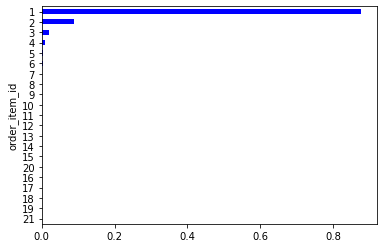

In [3]:
plot_freqs(raw_order_items, 'order_item_id')

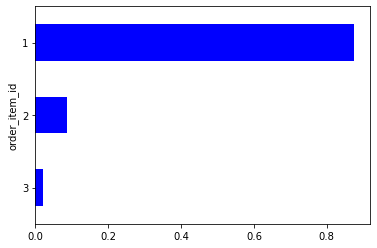

In [4]:
plot_freqs(raw_order_items, 'order_item_id', min=.01)

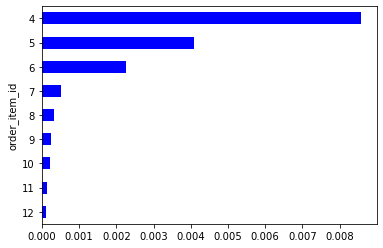

In [5]:
plot_freqs(raw_order_items, 'order_item_id', min=0.0001, max=.01)

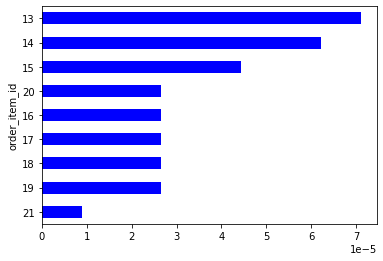

In [6]:
plot_freqs(raw_order_items, 'order_item_id', max=0.0001)

### PK-indexed order items table

Order items table has the couple `(order_id, order_item_id)` as 2-pk.

In [20]:
order_items = get_order_items().reset_index()
display(discrete_stats(order_items))

,n,n_u,n_na,fr,vr
order_items,,,,,
"(order_id, order_item_id)",112650,112650,0,1.0,1.000000
product_id,112650,32951,0,1.0,0.292508
seller_id,112650,3095,0,1.0,0.027474
shipping_limit_date,112650,93318,0,1.0,0.828389
price,112650,5968,0,1.0,0.052978
freight_value,112650,6999,0,1.0,0.062130


## Orders

There are **99 441** orders of which **96 478** are delivered.

We can see that `order_id` and `customer_id` are both primary keys : either can be used to individually identify each order (*).

Some dates (`'order_approved_at'`, `'order_delivered_carrier_date'`, `'order_delivered_customer_date'`) are not yet known, certainly in the case of orders being currently processed.

(*) We will take this into account when producing the tables indexed by their primary key: in the orders table, we will remove `customer_id`, on the one hand redundant with `order_id` and on the other hand introducing confusion, and in the customers table, we will replace the `customer_id` field by the corresponding `order_id` and rename the `customer_unique_id` field to `custormer_id`.

In [8]:
raw_orders = get_raw_orders()
display(discrete_stats(raw_orders))

,n,n_u,n_na,fr,vr
raw_orders,,,,,
order_id,99441,99441,0,1.000000,1.000000
customer_id,99441,99441,0,1.000000,1.000000
order_status,99441,8,0,1.000000,0.000080
order_purchase_timestamp,99441,98875,0,1.000000,0.994308
order_approved_at,99281,90733,160,0.998391,0.913901
order_delivered_carrier_date,97658,81018,1783,0.982070,0.829609
order_delivered_customer_date,96476,95664,2965,0.970183,0.991583
order_estimated_delivery_date,99441,459,0,1.000000,0.004616


### Some empirical distributions

Most of the orders have been completed, that is, are `delivered`. The few orders that are in other states correspond to orders being currently processed.

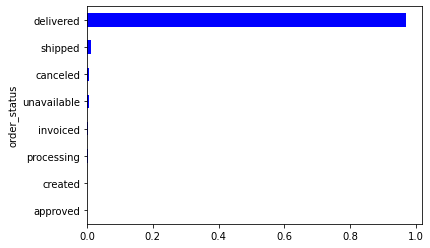

In [9]:
plot_value_freqs(raw_orders, 'order_status')
# TODO : first and last date of selection

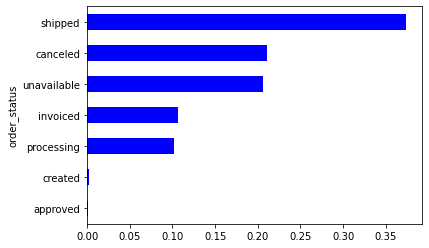

shipped        1107
canceled        625
unavailable     609
invoiced        314
processing      301
created           5
approved          2
Name: order_status, dtype: int64

In [10]:
undelivered_orders = raw_orders[raw_orders.order_status != 'delivered']
plot_value_freqs(undelivered_orders, 'order_status')
display(undelivered_orders.order_status.value_counts())
# TODO : first and last date of selection

### PK-indexed orders table

In [11]:
indexed_orders = get_orders().reset_index()
display(discrete_stats(indexed_orders))

,n,n_u,n_na,fr,vr
orders,,,,,
order_id,99441,99441,0,1.000000,1.000000
status,99441,8,0,1.000000,0.000080
purchase_timestamp,99441,98875,0,1.000000,0.994308
approved_at,99281,90733,160,0.998391,0.913901
delivered_carrier_date,97658,81018,1783,0.982070,0.829609
delivered_customer_date,96476,95664,2965,0.970183,0.991583
estimated_delivery_date,99441,459,0,1.000000,0.004616


### Subsampling examples

In [12]:
from olist_commons import index_of_delivered_orders
name = 'delivered_orders'
index = index_of_delivered_orders()
data = get_orders(orders_index=index).reset_index()
display(discrete_stats(data, name))

,n,n_u,n_na,fr,vr
delivered_orders,,,,,
order_id,96478,96478,0,1.000000,1.000000
status,96478,1,0,1.000000,0.000010
purchase_timestamp,96478,95956,0,1.000000,0.994589
approved_at,96464,88274,14,0.999855,0.915098
delivered_carrier_date,96476,80106,2,0.999979,0.830320
delivered_customer_date,96470,95658,8,0.999917,0.991583
estimated_delivery_date,96478,445,0,1.000000,0.004612


## Customers (customer orders)

There are **99 441** customers orders made by **96 096** anonymous customers.

The only data on customer orders is its `(state, city, zip_code)` location.

We saw above that `customer_id` is misnamed and represents a primary key that identifies a unique order. This field will be replaced by the corresponding `order_id` key in the indexed (and corrected) version of the table.

`customer_unique_id` does identify a unique user, but there are duplicates in the table due to customer mobility. We explore this aspect below.

In [13]:
raw_customers = get_raw_customers()
display(discrete_stats(raw_customers))

,n,n_u,n_na,fr,vr
raw_customers,,,,,
customer_id,99441,99441,0,1.0,1.000000
customer_unique_id,99441,96096,0,1.0,0.966362
customer_zip_code_prefix,99441,14994,0,1.0,0.150783
customer_city,99441,4119,0,1.0,0.041422
customer_state,99441,27,0,1.0,0.000272


### Some empirical distributions

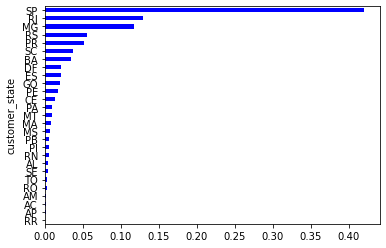

In [14]:
plot_freqs(raw_customers, 'customer_state')

### ⚠ uniqueness of `customer_unique_id`

The analysis below shows that `customer_unique_id` is not a primary key.

There are indeed **248** duplicates and even **four** 3-duplicates.

These results lead to the conclusion that some customers are nomads or have moved.

This marginal point having been raised (it concerns 0.25% of customers), we assume that Olist knows what it is doing, and that if the customer is identified as unique, it is not an error. On the other hand, keep in mind that its location can be variable, even if in 99.75% of cases, it remains constant.

In [15]:
# We delete the customer_id (order_id) column then we deduplicate
unique_customers = raw_customers[raw_customers.columns[1:]].copy()
unique_customers = unique_customers.drop_duplicates()
# vr(customer_unique_id) ≠ 1 ⇒ not a pk
display(discrete_stats(unique_customers))

,n,n_u,n_na,fr,vr
raw_customers,,,,,
customer_unique_id,96352,96096,0,1.0,0.997343
customer_zip_code_prefix,96352,14994,0,1.0,0.155617
customer_city,96352,4119,0,1.0,0.042750
customer_state,96352,27,0,1.0,0.000280


Let's explore the duplicates (248 doubles and even 4 triplets)

In [16]:
vc = unique_customers.customer_unique_id.value_counts()
display(vc[vc > 1])

3e43e6105506432c953e165fb2acf44c    3
d44ccec15f5f86d14d6a2cfa67da1975    3
b9badb100ff8ecc16a403111209e3a06    3
9832ae2f7d3e5fa4c7a1a06e9551bc61    3
004b45ec5c64187465168251cd1c9c2f    2
                                   ..
e7688fef5438be571d0c39bbb3e8e998    2
e35b2a3c980b6e0fc66c66b8e1122e93    2
9b7fcde05dd369caf4dea1f04ed39fcc    2
f113042ff356f926d517f3087d4a1ba8    2
6345e3b3ba5ee47685e29ec5febc8155    2
Name: customer_unique_id, Length: 252, dtype: int64

Let's visualize the triplets

In [17]:
triple_index = vc[vc > 2].index
display(triple_index)

Index(['3e43e6105506432c953e165fb2acf44c', 'd44ccec15f5f86d14d6a2cfa67da1975',
       'b9badb100ff8ecc16a403111209e3a06', '9832ae2f7d3e5fa4c7a1a06e9551bc61'],
      dtype='object')

In [18]:
bindex = unique_customers.customer_unique_id.isin(triple_index)
display(unique_customers[bindex].sort_values(by='customer_unique_id'))

raw_customers,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
5113,3e43e6105506432c953e165fb2acf44c,11701,praia grande,SP
6129,3e43e6105506432c953e165fb2acf44c,11700,praia grande,SP
20597,3e43e6105506432c953e165fb2acf44c,11704,praia grande,SP
30846,9832ae2f7d3e5fa4c7a1a06e9551bc61,25213,duque de caxias,RJ
68788,9832ae2f7d3e5fa4c7a1a06e9551bc61,20520,rio de janeiro,RJ
74754,9832ae2f7d3e5fa4c7a1a06e9551bc61,25212,duque de caxias,RJ
20287,b9badb100ff8ecc16a403111209e3a06,03014,sao paulo,SP
72560,b9badb100ff8ecc16a403111209e3a06,88025,florianopolis,SC
92205,b9badb100ff8ecc16a403111209e3a06,88085,florianopolis,SC
45851,d44ccec15f5f86d14d6a2cfa67da1975,03533,sao paulo,SP


### PK-indexed customer orders table

**Note** - Geolocation cities have been fixed to standard names (geolocation normalization).

In [21]:
customer_orders = get_customer_orders().reset_index()
display(discrete_stats(customer_orders))

,n,n_u,n_na,fr,vr
customers_orders,,,,,
order_id,99441,99441,0,1.0,1.000000
customer_id,99441,96096,0,1.0,0.966362
zip_code_prefix,99441,14994,0,1.0,0.150783
city,99441,3892,0,1.0,0.039139
state,99441,27,0,1.0,0.000272


### Subsampling examples

#### Sedentary customers

In [23]:
from olist_commons import index_of_sedentary_customers_v1, get_customer_orders_v1
from pepper_commons import discrete_stats
name = 'sedentary_customers'
index = index_of_sedentary_customers_v1()
data = get_customer_orders_v1().reset_index().set_index('customer_id')
data = data.loc[index].reset_index()
display(discrete_stats(data, name))

,n,n_u,n_na,fr,vr
sedentary_customers,,,,,
customer_id,98900,95844,0,1.0,0.969100
order_id,98900,98900,0,1.0,1.000000
zip_code_prefix,98900,14974,0,1.0,0.151405
city,98900,4118,0,1.0,0.041638
state,98900,27,0,1.0,0.000273


In [25]:
from olist_commons import index_of_sedentary_customers, get_customers
from pepper_commons import discrete_stats
name = 'sedentary_customers'
index = index_of_sedentary_customers()
#display(index)
data = get_customers()
#display(data)
display(discrete_stats(data, name))

,n,n_u,n_na,fr,vr
sedentary_customers,,,,,
order_id,96096,96096,0,1.0,1.000000
zip_code_prefix,96096,17472,0,1.0,0.181818
city,96096,4868,0,1.0,0.050658
state,96096,126,0,1.0,0.001311


#### Nomadic customers

In [26]:
from olist_commons import (
    index_of_nomadic_customers_v1,
    get_customer_orders_v1,
    normalize_city_names_v1
)
from pepper_commons import discrete_stats
from olist_commons import index_of_nomadic_customers
name = 'nomadic_customers'
index = index_of_nomadic_customers_v1()
data = get_customer_orders_v1().reset_index().set_index('customer_id')
data = data.loc[index].reset_index()
data = normalize_city_names_v1(data)
display(discrete_stats(data, name))

,n,n_u,n_na,fr,vr
nomadic_customers,,,,,
customer_id,541,252,0,1.0,0.465804
order_id,541,541,0,1.0,1.000000
zip_code_prefix,541,480,0,1.0,0.887246
city,541,176,0,1.0,0.325323
state,541,23,0,1.0,0.042514


In [27]:
from olist_commons import (
    index_of_nomadic_customers,
    get_customers,
    normalize_city_names
)
from pepper_commons import discrete_stats
from olist_commons import index_of_nomadic_customers
name = 'nomadic_customers'
index = index_of_nomadic_customers()
data = get_customers(index)
display(discrete_stats(data, name))

,n,n_u,n_na,fr,vr
nomadic_customers,,,,,
order_id,250,250,0,1.0,1.000
zip_code_prefix,250,250,0,1.0,1.000
city,250,182,0,1.0,0.728
state,250,57,0,1.0,0.228


## Products

There are **32 951** products.

`product_id` is the primary key.

**2** products have neither *dimensions* nor *weight*.

**610** products do not have *marketing sheet* to present them.

In [28]:
raw_products = get_raw_products()
display(discrete_stats(raw_products))

,n,n_u,n_na,fr,vr
raw_products,,,,,
product_id,32951,32951,0,1.000000,1.000000
product_category_name,32341,73,610,0.981488,0.002257
product_name_lenght,32341,66,610,0.981488,0.002041
product_description_lenght,32341,2960,610,0.981488,0.091525
product_photos_qty,32341,19,610,0.981488,0.000587
product_weight_g,32949,2204,2,0.999939,0.066891
product_length_cm,32949,99,2,0.999939,0.003005
product_height_cm,32949,102,2,0.999939,0.003096
product_width_cm,32949,95,2,0.999939,0.002883


2 products have neither dimensions nor weight.

One of them doesn't have a product sheet either : we will call it the unknown product.

In [31]:
display(raw_products[raw_products.product_weight_g.isna()])

raw_products,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60,865,3,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


610 products do not have product sheet to present them :

In [30]:
display(raw_products[raw_products.product_category_name.isna()])

raw_products,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650,17,14,12
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300,16,7,20
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200,20,20,20
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500,41,30,41
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300,35,7,12
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800,30,20,70
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800,30,10,23
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200,21,8,16
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300,45,16,45


### PK-indexed products table

In [32]:
products = get_products().reset_index()
display(discrete_stats(products))

,n,n_u,n_na,fr,vr
products,,,,,
product_id,32951,32951,0,1.000000,1.000000
category_name,32341,73,610,0.981488,0.002257
name_lenght,32341,66,610,0.981488,0.002041
description_lenght,32341,2960,610,0.981488,0.091525
photos_qty,32341,19,610,0.981488,0.000587
weight_g,32949,2204,2,0.999939,0.066891
length_cm,32949,99,2,0.999939,0.003005
height_cm,32949,102,2,0.999939,0.003096
width_cm,32949,95,2,0.999939,0.002883


### Subsampling examples

#### Undimensioned products

In [33]:
from olist_commons import index_of_undimensioned_products
name = 'undimensioned_products'
index = index_of_undimensioned_products()
data = get_products(products_index=index)
display(discrete_stats(data.reset_index(), name))

,n,n_u,n_na,fr,vr
undimensioned_products,,,,,
product_id,2,2,0,1.0,1.0
category_name,1,1,1,0.5,1.0
name_lenght,1,1,1,0.5,1.0
description_lenght,1,1,1,0.5,1.0
photos_qty,1,1,1,0.5,1.0
weight_g,0,0,2,0.0,NaN
length_cm,0,0,2,0.0,NaN
height_cm,0,0,2,0.0,NaN
width_cm,0,0,2,0.0,NaN


#### Undocumented products

In [39]:
from olist_commons import index_of_undocumented_products
name = 'undocumented_products'
index = index_of_undocumented_products()
data = get_products(products_index=index).reset_index()
display(discrete_stats(data, name))

,n,n_u,n_na,fr,vr
undocumented_products,,,,,
product_id,610,610,0,1.000000,1.000000
category_name,0,0,610,0.000000,NaN
name_lenght,0,0,610,0.000000,NaN
description_lenght,0,0,610,0.000000,NaN
photos_qty,0,0,610,0.000000,NaN
weight_g,609,145,1,0.998361,0.238095
length_cm,609,54,1,0.998361,0.088670
height_cm,609,49,1,0.998361,0.080460
width_cm,609,47,1,0.998361,0.077176


#### Unknown products

In [40]:
from olist_commons import index_of_unknown_products
name = 'unknown_products'
index = index_of_unknown_products()
data = get_products(products_index=index).reset_index()
display(discrete_stats(data, name))

,n,n_u,n_na,fr,vr
unknown_products,,,,,
product_id,1,1,0,1.0,1.0
category_name,0,0,1,0.0,NaN
name_lenght,0,0,1,0.0,NaN
description_lenght,0,0,1,0.0,NaN
photos_qty,0,0,1,0.0,NaN
weight_g,0,0,1,0.0,NaN
length_cm,0,0,1,0.0,NaN
height_cm,0,0,1,0.0,NaN
width_cm,0,0,1,0.0,NaN


#### Fully qualified products

In [42]:
from olist_commons import index_of_fully_qualified_products
name = 'fully_qualified_products'
index = index_of_fully_qualified_products()
data = get_products(products_index=index).reset_index()
display(discrete_stats(data, name))

,n,n_u,n_na,fr,vr
fully_qualified_products,,,,,
product_id,32340,32340,0,1.0,1.000000
category_name,32340,73,0,1.0,0.002257
name_lenght,32340,66,0,1.0,0.002041
description_lenght,32340,2960,0,1.0,0.091528
photos_qty,32340,19,0,1.0,0.000588
weight_g,32340,2202,0,1.0,0.068089
length_cm,32340,99,0,1.0,0.003061
height_cm,32340,102,0,1.0,0.003154
width_cm,32340,95,0,1.0,0.002938


## Sellers

There are **3 095** sellers.

`seller_id` is the primary key.

The only data on sellers is the `(state, city, zip_code)` location.

As for the customer, the seller is anonymous: even his name is not indicated.

In [44]:
raw_sellers = get_raw_sellers()
display(discrete_stats(raw_sellers))

,n,n_u,n_na,fr,vr
raw_sellers,,,,,
seller_id,3095,3095,0,1.0,1.000000
seller_zip_code_prefix,3095,2246,0,1.0,0.725687
seller_city,3095,611,0,1.0,0.197415
seller_state,3095,23,0,1.0,0.007431


### Some empirical distributions

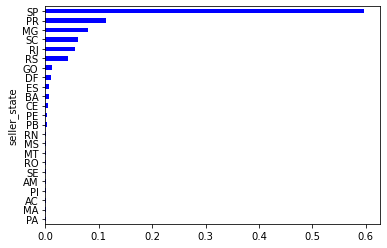

In [45]:
plot_freqs(raw_sellers, 'seller_state')

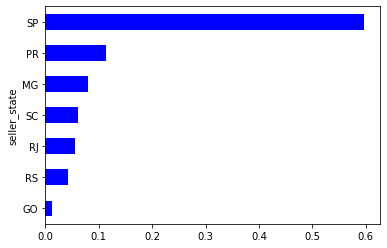

In [46]:
plot_freqs(raw_sellers, 'seller_state', min=.01)

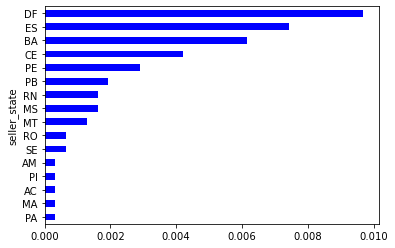

In [47]:
plot_freqs(raw_sellers, 'seller_state', min=.0001, max=.01)

### PK-indexed sellers table

**Note** that the city names are normalized in the pk-indexed table.

In [49]:
sellers = get_sellers().reset_index()
display(discrete_stats(sellers))

,n,n_u,n_na,fr,vr
sellers,,,,,
seller_id,3095,3095,0,1.0,1.000000
zip_code_prefix,3095,2246,0,1.0,0.725687
city,3095,551,0,1.0,0.178029
state,3095,23,0,1.0,0.007431


## Order payments

**Note**: A *boleto* is a ticket.

There are **103 886** *order payments* related to **99 440** *orders*.

Order payments table has the couple `(order_id, payment_sequential)` as 2-pk.

In [50]:
raw_order_payments = get_raw_order_payments()
display(discrete_stats(raw_order_payments))

,n,n_u,n_na,fr,vr
raw_order_payments,,,,,
order_id,103886,99440,0,1.0,0.957203
payment_sequential,103886,29,0,1.0,0.000279
payment_type,103886,5,0,1.0,0.000048
payment_installments,103886,24,0,1.0,0.000231
payment_value,103886,29077,0,1.0,0.279893


### Some empirical distributions

#### Payment type

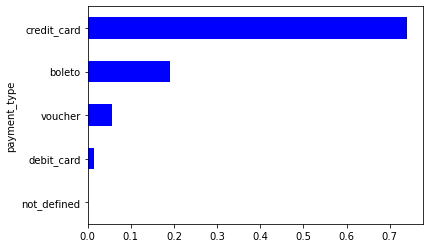

In [51]:
plot_value_freqs(raw_order_payments, 'payment_type')

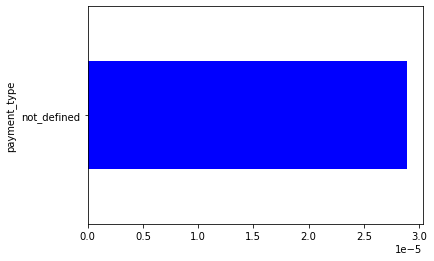

In [52]:
plot_freqs(raw_order_payments, 'payment_type', max=.01)

#### Payment installments

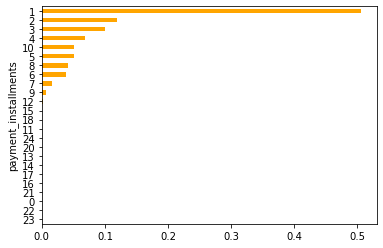

In [53]:
plot_freqs(raw_order_payments, 'payment_installments', c='orange')

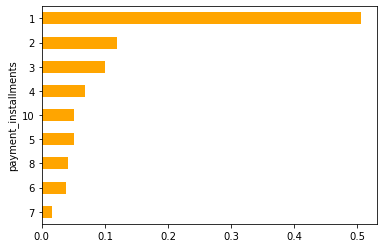

In [54]:
plot_freqs(raw_order_payments, 'payment_installments', min=.01, c='orange')

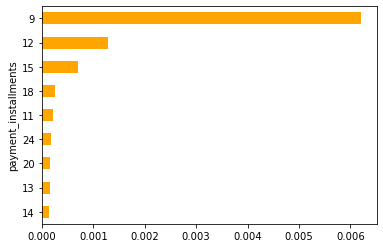

In [55]:
plot_freqs(raw_order_payments, 'payment_installments', max=.01, min=.0001, c='orange')

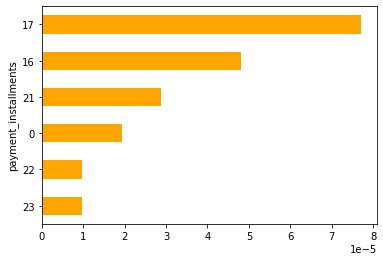

In [56]:
plot_freqs(raw_order_payments, 'payment_installments', max=.0001, c='orange')

#### Payment sequential

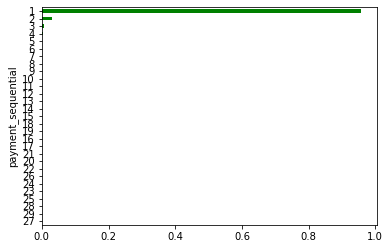

In [57]:
plot_freqs(raw_order_payments, 'payment_sequential', c='green')

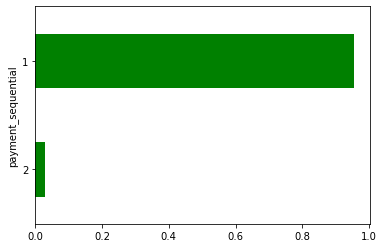

In [58]:
plot_freqs(raw_order_payments, 'payment_sequential', min=.01, c='green')

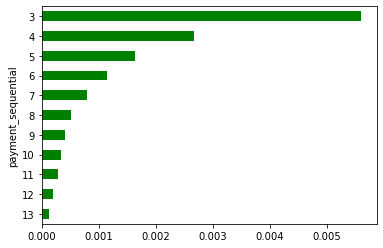

In [59]:
plot_freqs(raw_order_payments, 'payment_sequential', min=.0001, max=.01, c='green')

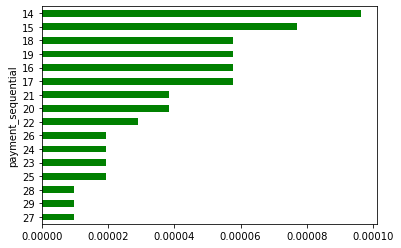

In [60]:
plot_freqs(raw_order_payments, 'payment_sequential', max=.0001, c='green')

### PK-indexed order payments table

Order payments table has the couple `(order_id, payment_sequential)` as 2-pk.

In [61]:
order_payments = get_order_payments().reset_index()
display(discrete_stats(order_payments))

,n,n_u,n_na,fr,vr
order_payments,,,,,
"(order_id, sequential)",103886,103886,0,1.0,1.000000
type,103886,5,0,1.0,0.000048
installments,103886,24,0,1.0,0.000231
value,103886,29077,0,1.0,0.279893


## Order reviews

There are **99 224** *order reviews* relatied to **98 673** *orders*.

Order reviews table has the couple `(order_id, review_id)` as 2-pk.

In [62]:
raw_order_reviews = get_raw_order_reviews()
display(discrete_stats(raw_order_reviews))

,n,n_u,n_na,fr,vr
raw_order_reviews,,,,,
review_id,99224,98410,0,1.000000,0.991796
order_id,99224,98673,0,1.000000,0.994447
review_score,99224,5,0,1.000000,0.000050
review_comment_title,11568,4527,87656,0.116585,0.391338
review_comment_message,40977,36159,58247,0.412975,0.882422
review_creation_date,99224,636,0,1.000000,0.006410
review_answer_timestamp,99224,98248,0,1.000000,0.990164


### Some empirical distributions

#### Review scores

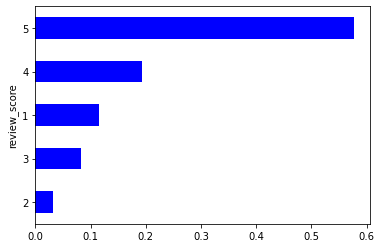

In [63]:
plot_freqs(raw_order_reviews, 'review_score')

### PK-indexed order reviews table

Order reviews table has the couple `(order_id, review_id)` as 2-pk.

In [65]:
order_reviews = get_order_reviews().reset_index()
display(discrete_stats(order_reviews))

,n,n_u,n_na,fr,vr
order_reviews,,,,,
"(order_id, review_id)",99224,99224,0,1.000000,1.000000
score,99224,5,0,1.000000,0.000050
comment_title,11568,4527,87656,0.116585,0.391338
comment_message,40977,36159,58247,0.412975,0.882422
creation_date,99224,636,0,1.000000,0.006410
answer_timestamp,99224,98248,0,1.000000,0.990164


## Product categories

The **product categories table** is an associative table of the 71 categories, with labels in Portuguee and in English.

In [66]:
raw_product_categories = get_raw_product_categories()
display(discrete_stats(raw_product_categories))

,n,n_u,n_na,fr,vr
raw_product_categories,,,,,
product_category_name,71,71,0,1.0,1.0
product_category_name_english,71,71,0,1.0,1.0


### PK-indexed product categories table

**Note**: two additional categories have been recorded (index [71, 72]).

In [67]:
product_categories = get_product_categories()
display(discrete_stats(product_categories))
display(product_categories)

,n,n_u,n_na,fr,vr
product_categories,,,,,
category_name,73,73,0,1.0,1.000000
category_name_EN,73,73,0,1.0,1.000000
products_count,73,65,0,1.0,0.890411


product_categories,category_name,category_name_EN,products_count
product_category_id,,,
0,beleza_saude,health_beauty,2444
1,informatica_acessorios,computers_accessories,1639
2,automotivo,auto,1900
3,cama_mesa_banho,bed_bath_table,3029
4,moveis_decoracao,furniture_decor,2657
...,...,...,...
68,fraldas_higiene,diapers_and_hygiene,12
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,5
70,seguros_e_servicos,security_and_services,2


## Geolocations

In [69]:
raw_geolocations = get_raw_geolocations()
display(discrete_stats(raw_geolocations))

,n,n_u,n_na,fr,vr
raw_geolocation,,,,,
geolocation_zip_code_prefix,1000163,19015,0,1.0,0.019012
geolocation_lat,1000163,717372,0,1.0,0.717255
geolocation_lng,1000163,717615,0,1.0,0.717498
geolocation_city,1000163,8011,0,1.0,0.008010
geolocation_state,1000163,27,0,1.0,0.000027


### Some empirical distributions

#### Geolocation state

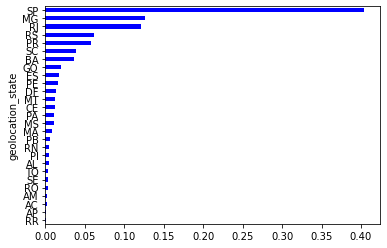

In [70]:
plot_freqs(raw_geolocations, 'geolocation_state')

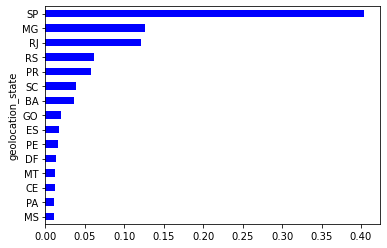

In [71]:
plot_freqs(raw_geolocations, 'geolocation_state', min=.01)

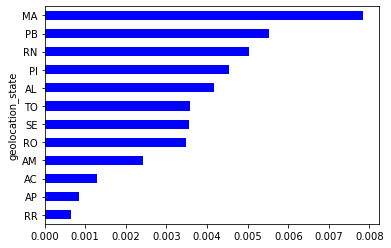

In [72]:
plot_freqs(raw_geolocations, 'geolocation_state', max=.01, min=.0001)

### PK-indexed geolocations table

**Note** that the city names are normalized in the pk-indexed table.

In [74]:
geolocations = get_geolocations().reset_index()
display(discrete_stats(geolocations))

,n,n_u,n_na,fr,vr
geolocation,,,,,
geolocation_id,1000163,1000163,0,1.0,1.000000
lat,1000163,717372,0,1.0,0.717255
lng,1000163,717615,0,1.0,0.717498
zip_code_prefix,1000163,19015,0,1.0,0.019012
city,1000163,5228,0,1.0,0.005227
state,1000163,27,0,1.0,0.000027


# Entities and relationships: database schema discovery

<img src='../img/relational_schema_v2.jpg' alt='relational_schema_v2' width='500' height='400'/>

## Load of tables

In [77]:
from pepper_commons import discrete_stats
from olist_commons import (
    get_order_items,
    get_orders,
    get_customer_orders,
    get_products,
    get_sellers,
    get_order_payments,
    get_order_reviews,
    get_product_categories,
    get_geolocations,
)
from olist_commons import (
    print_out_of_intersection,
    display_relation_arities,
)
from olist_commons import normalize_city_names


order_items = get_order_items().reset_index()
order_items['order_id'] = (
    order_items['(order_id, order_item_id)']
    .apply(lambda x: x[0])
)

orders = get_orders().reset_index()

customer_orders = get_customer_orders().reset_index()

products = get_products().reset_index()

sellers = get_sellers().reset_index()

order_payments = get_order_payments().reset_index()
order_payments['order_id'] = (
    order_payments['(order_id, sequential)']
    .apply(lambda x: x[0])
)

order_reviews = get_order_reviews().reset_index()
order_reviews['order_id'] = (
    order_reviews['(order_id, review_id)']
    .apply(lambda x: x[0])
)
order_reviews['review_id'] = (
    order_reviews['(order_id, review_id)']
    .apply(lambda x: x[1])
)

product_categories = get_product_categories().reset_index()

geolocations = get_geolocations().reset_index()

## 1st relationship : `order_item` → `order`

* **90%** of orders consist of only **one** item (one product), **8%** consist of **two**.
* The longest order consists of **21** products.
* **It is surprising to discover 775 (0.008%) orders with no items.** The turnover related to these orders can be traced, as well as the dates and processing times, but they cannot be linked to a particular product or seller. Further investigation shows that these are undelivered status orders, mainly `unavailable` (603) and `cancelled` (164).

### Reminder

In [78]:
display(discrete_stats(order_items))

,n,n_u,n_na,fr,vr
order_items,,,,,
"(order_id, order_item_id)",112650,112650,0,1.0,1.000000
product_id,112650,32951,0,1.0,0.292508
seller_id,112650,3095,0,1.0,0.027474
shipping_limit_date,112650,93318,0,1.0,0.828389
price,112650,5968,0,1.0,0.052978
freight_value,112650,6999,0,1.0,0.062130
order_id,112650,98666,0,1.0,0.875863


In [79]:
display(discrete_stats(orders))

,n,n_u,n_na,fr,vr
orders,,,,,
order_id,99441,99441,0,1.000000,1.000000
status,99441,8,0,1.000000,0.000080
purchase_timestamp,99441,98875,0,1.000000,0.994308
approved_at,99281,90733,160,0.998391,0.913901
delivered_carrier_date,97658,81018,1783,0.982070,0.829609
delivered_customer_date,96476,95664,2965,0.970183,0.991583
estimated_delivery_date,99441,459,0,1.000000,0.004616


### (775) free electrons

In [80]:
print_out_of_intersection(order_items, orders, 'order_id')

|order_items.order_id| : 98666
|orders.order_id| : 99441
|order_items.order_id \ orders.order_id| : 0 (0.0%)
|orders.order_id \ order_items.order_id| : 775 (0.779%)


In [81]:
from olist_commons import out_of_intersection
(
    pk_A, pk_B, pk_A_not_B, pk_B_not_A
) = out_of_intersection(order_items, orders, 'order_id')
orders_without_items = orders[orders.order_id.isin(pk_B_not_A)]
display(orders_without_items.status.value_counts())
display(orders_without_items)

unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: status, dtype: int64

orders,order_id,status,purchase_timestamp,approved_at,delivered_carrier_date,delivered_customer_date,estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
586,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
687,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05
737,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06
1130,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06
99283,3a3cddda5a7c27851bd96c3313412840,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99347,a89abace0dcc01eeb267a9660b5ac126,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


### Arities

relation arities : [order_items](0..21)--(1..1)[orders]


"(order_id, order_item_id) by order_id",sum,1,2,3,4,5,6,7,8,10,12,11,9,15,14,20,13,21
count,98666.0,88863.000000,7516.000000,1322.000000,505.000000,204.000000,198.000000,22.000000,8.000000,8.000000,5.000000,4.000000,3.00000,2.00000,2.00000,2.00000,1.00000,1.00000
freq,1.0,0.900645,0.076176,0.013399,0.005118,0.002068,0.002007,0.000223,0.000081,0.000081,0.000051,0.000041,0.00003,0.00002,0.00002,0.00002,0.00001,0.00001


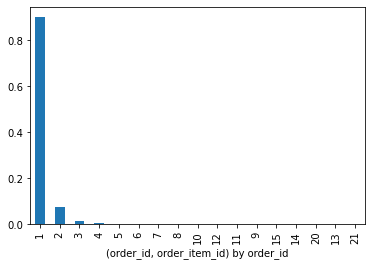

"order_id by (order_id, order_item_id)",sum,1
count,112650.0,112650.0
freq,1.0,1.0


In [82]:
import matplotlib.pyplot as plt
ab, ba, _, _, _, _ = display_relation_arities(
    order_items, '(order_id, order_item_id)',
    orders, 'order_id'
)
display(ab)
ab.drop(columns='sum').T.freq.plot.bar()
plt.show()
display(ba)

## 2nd relationship : `customer_order` → `order`

### Reminder

In [83]:
display(discrete_stats(customer_orders))

,n,n_u,n_na,fr,vr
customers_orders,,,,,
order_id,99441,99441,0,1.0,1.000000
customer_id,99441,96096,0,1.0,0.966362
zip_code_prefix,99441,14994,0,1.0,0.150783
city,99441,3892,0,1.0,0.039139
state,99441,27,0,1.0,0.000272


In [84]:
display(discrete_stats(orders))

,n,n_u,n_na,fr,vr
orders,,,,,
order_id,99441,99441,0,1.000000,1.000000
status,99441,8,0,1.000000,0.000080
purchase_timestamp,99441,98875,0,1.000000,0.994308
approved_at,99281,90733,160,0.998391,0.913901
delivered_carrier_date,97658,81018,1783,0.982070,0.829609
delivered_customer_date,96476,95664,2965,0.970183,0.991583
estimated_delivery_date,99441,459,0,1.000000,0.004616


### (No) free electrons

In [85]:
print_out_of_intersection(customer_orders, orders, 'order_id')

|customers_orders.order_id| : 99441
|orders.order_id| : 99441
|customers_orders.order_id \ orders.order_id| : 0 (0.0%)
|orders.order_id \ customers_orders.order_id| : 0 (0.0%)


### Arities

relation arities : [customers_orders](1..1)--(1..17)[orders]


customer_id by order_id,sum,1
count,99441.0,99441.0
freq,1.0,1.0


order_id by customer_id,sum,1,2,3,4,5,6,7,9,17
count,96096.0,93099.000000,2745.000000,203.000000,30.000000,8.000000,6.000000,3.000000,1.00000,1.00000
freq,1.0,0.968812,0.028565,0.002112,0.000312,0.000083,0.000062,0.000031,0.00001,0.00001


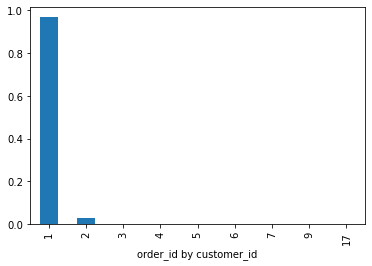

In [86]:
import matplotlib.pyplot as plt
ab, ba, _, _, _, _ = display_relation_arities(
    customer_orders, 'customer_id',
    orders, 'order_id'
)
display(ab)
display(ba)
ba.drop(columns='sum').T.freq.plot.bar()
plt.show()

## 3rd relationship : `order_item` → `product`

* Any order item is related to one product and only one.
* The **best selling** product has been sold 527 times.
* 55% of products were sold only, 18% twice, 8% three times, 5% four times, ..
* No product has ever been sold: all products referenced have been sold at least once.

**Note**: the frequency of sale of a product (its popularity) could be a relevant feature for user segmentation: we can build a score to know if the customer buys popular products or not.

### Reminder

In [87]:
display(discrete_stats(order_items))

,n,n_u,n_na,fr,vr
order_items,,,,,
"(order_id, order_item_id)",112650,112650,0,1.0,1.000000
product_id,112650,32951,0,1.0,0.292508
seller_id,112650,3095,0,1.0,0.027474
shipping_limit_date,112650,93318,0,1.0,0.828389
price,112650,5968,0,1.0,0.052978
freight_value,112650,6999,0,1.0,0.062130
order_id,112650,98666,0,1.0,0.875863


In [88]:
display(discrete_stats(products))

,n,n_u,n_na,fr,vr
products,,,,,
product_id,32951,32951,0,1.000000,1.000000
category_name,32341,73,610,0.981488,0.002257
name_lenght,32341,66,610,0.981488,0.002041
description_lenght,32341,2960,610,0.981488,0.091525
photos_qty,32341,19,610,0.981488,0.000587
weight_g,32949,2204,2,0.999939,0.066891
length_cm,32949,99,2,0.999939,0.003005
height_cm,32949,102,2,0.999939,0.003096
width_cm,32949,95,2,0.999939,0.002883


### (No) free electrons

In [89]:
print_out_of_intersection(order_items, products, 'product_id')

|order_items.product_id| : 32951
|products.product_id| : 32951
|order_items.product_id \ products.product_id| : 0 (0.0%)
|products.product_id \ order_items.product_id| : 0 (0.0%)


### Arities

relation arities : [order_items](1..527)--(1..1)[products]


"(order_id, order_item_id) by product_id",sum,1,2,3,4,5,6,7,8,9,...,155,51,146,118,373,323,77,114,197,154
count,32951.0,18117.000000,5817.000000,2651.000000,1534.000000,994.000000,736.000000,515.000000,379.000000,289.000000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
freq,1.0,0.549816,0.176535,0.080453,0.046554,0.030166,0.022336,0.015629,0.011502,0.008771,...,0.00003,0.00003,0.00003,0.00003,0.00003,0.00003,0.00003,0.00003,0.00003,0.00003


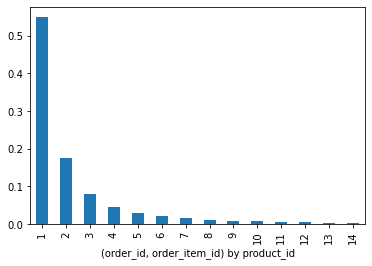

"product_id by (order_id, order_item_id)",sum,1
count,112650.0,112650.0
freq,1.0,1.0


In [90]:
import matplotlib.pyplot as plt
ab, ba, _, _, _, _ = display_relation_arities(
    order_items, '(order_id, order_item_id)',
    products, 'product_id'
)
display(ab)
ab[ab.columns[1:15]].T.freq.plot.bar()
plt.show()
display(ba)

## 4th relationship : `order_item` → `seller`

* Any order item is related to one seller and only one.
* The **top seller** sold 2,033 times.
* 16% of sellers have sold once, 10% twice, 7% three times, ..

### Reminder

In [91]:
display(discrete_stats(order_items))

,n,n_u,n_na,fr,vr
order_items,,,,,
"(order_id, order_item_id)",112650,112650,0,1.0,1.000000
product_id,112650,32951,0,1.0,0.292508
seller_id,112650,3095,0,1.0,0.027474
shipping_limit_date,112650,93318,0,1.0,0.828389
price,112650,5968,0,1.0,0.052978
freight_value,112650,6999,0,1.0,0.062130
order_id,112650,98666,0,1.0,0.875863


In [92]:
display(discrete_stats(sellers))

,n,n_u,n_na,fr,vr
sellers,,,,,
seller_id,3095,3095,0,1.0,1.000000
zip_code_prefix,3095,2246,0,1.0,0.725687
city,3095,551,0,1.0,0.178029
state,3095,23,0,1.0,0.007431


### (No) free electrons

In [93]:
print_out_of_intersection(order_items, sellers, 'seller_id')

|order_items.seller_id| : 3095
|sellers.seller_id| : 3095
|order_items.seller_id \ sellers.seller_id| : 0 (0.0%)
|sellers.seller_id \ order_items.seller_id| : 0 (0.0%)


### Arities

relation arities : [order_items](1..2033)--(1..1)[sellers]


"(order_id, order_item_id) by seller_id",sum,1,2,3,4,5,7,6,8,11,...,2033,326,798,133,188,270,204,454,395,306
count,3095.0,509.000000,328.000000,212.000000,152.000000,142.00000,101.000000,99.000000,96.000000,82.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
freq,1.0,0.164459,0.105977,0.068498,0.049111,0.04588,0.032633,0.031987,0.031018,0.026494,...,0.000323,0.000323,0.000323,0.000323,0.000323,0.000323,0.000323,0.000323,0.000323,0.000323


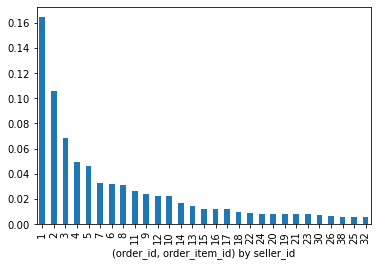

"seller_id by (order_id, order_item_id)",sum,1
count,112650.0,112650.0
freq,1.0,1.0


In [94]:
import matplotlib.pyplot as plt
ab, ba, _, _, _, _ = display_relation_arities(
    order_items, '(order_id, order_item_id)',
    sellers, 'seller_id'
)
display(ab)
ab[ab.columns[1:30]].T.freq.plot.bar()
plt.show()
display(ba)

## 5th relationship : `order_payment` → `order`

* **97%** of orders consist of only **one** payment, **2%** consist of **two**, ..
* The longest order settlement consists of **29** payments.
* Any paid order corresponds to an order. **But there is an order (only one) that has not been paid**.

### Reminder

In [95]:
display(discrete_stats(order_payments))

,n,n_u,n_na,fr,vr
order_payments,,,,,
"(order_id, sequential)",103886,103886,0,1.0,1.000000
type,103886,5,0,1.0,0.000048
installments,103886,24,0,1.0,0.000231
value,103886,29077,0,1.0,0.279893
order_id,103886,99440,0,1.0,0.957203


In [96]:
display(discrete_stats(orders))

,n,n_u,n_na,fr,vr
orders,,,,,
order_id,99441,99441,0,1.000000,1.000000
status,99441,8,0,1.000000,0.000080
purchase_timestamp,99441,98875,0,1.000000,0.994308
approved_at,99281,90733,160,0.998391,0.913901
delivered_carrier_date,97658,81018,1783,0.982070,0.829609
delivered_customer_date,96476,95664,2965,0.970183,0.991583
estimated_delivery_date,99441,459,0,1.000000,0.004616


### (1) free electron

In [97]:
print_out_of_intersection(order_payments, orders, 'order_id')

|order_payments.order_id| : 99440
|orders.order_id| : 99441
|order_payments.order_id \ orders.order_id| : 0 (0.0%)
|orders.order_id \ order_payments.order_id| : 1 (0.001%)


### Arities

relation arities : [order_payments](0..29)--(1..1)[orders]


"(order_id, sequential) by order_id",sum,1,2,3,4,5,6,7,8,9,...,12,10,13,15,14,19,22,21,26,29
count,99440.0,96479.000000,2382.000000,301.000000,108.000000,52.000000,36.000000,28.000000,11.000000,9.000000,...,8.00000,5.00000,3.00000,2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000
freq,1.0,0.970223,0.023954,0.003027,0.001086,0.000523,0.000362,0.000282,0.000111,0.000091,...,0.00008,0.00005,0.00003,0.00002,0.00002,0.00002,0.00001,0.00001,0.00001,0.00001


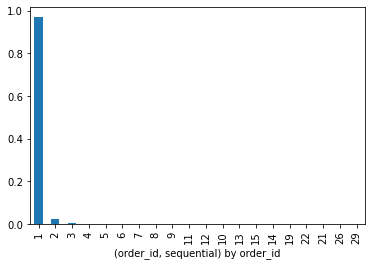

"order_id by (order_id, sequential)",sum,1
count,103886.0,103886.0
freq,1.0,1.0


In [99]:
import matplotlib.pyplot as plt
ab, ba, _, _, _, _ = display_relation_arities(
    order_payments, '(order_id, sequential)',
    orders, 'order_id'
)
display(ab)
ab.drop(columns='sum').T.freq.plot.bar()
plt.show()
display(ba)

## 6th relationship : `order_review` → `order`

* **99%** of orders consist of only **one** review and reciprocally.
* An order can have up to **3** reviews and reciprocally.
* 768 (0.772%) orders have not been reviewed.

99.2% of orders therefore have an appreciation.

This therefore makes review a feature, if not relevant, at least interesting.

### Reminder

In [100]:
display(discrete_stats(order_reviews))

,n,n_u,n_na,fr,vr
order_reviews,,,,,
"(order_id, review_id)",99224,99224,0,1.000000,1.000000
score,99224,5,0,1.000000,0.000050
comment_title,11568,4527,87656,0.116585,0.391338
comment_message,40977,36159,58247,0.412975,0.882422
creation_date,99224,636,0,1.000000,0.006410
answer_timestamp,99224,98248,0,1.000000,0.990164
order_id,99224,98673,0,1.000000,0.994447
review_id,99224,98410,0,1.000000,0.991796


In [101]:
display(discrete_stats(orders))

,n,n_u,n_na,fr,vr
orders,,,,,
order_id,99441,99441,0,1.000000,1.000000
status,99441,8,0,1.000000,0.000080
purchase_timestamp,99441,98875,0,1.000000,0.994308
approved_at,99281,90733,160,0.998391,0.913901
delivered_carrier_date,97658,81018,1783,0.982070,0.829609
delivered_customer_date,96476,95664,2965,0.970183,0.991583
estimated_delivery_date,99441,459,0,1.000000,0.004616


### (768) free electrons

In [102]:
print_out_of_intersection(order_reviews, orders, 'order_id')

|order_reviews.order_id| : 98673
|orders.order_id| : 99441
|order_reviews.order_id \ orders.order_id| : 0 (0.0%)
|orders.order_id \ order_reviews.order_id| : 768 (0.772%)


### Arities

In [103]:
import matplotlib.pyplot as plt
ab, ba, _, _, _, _ = display_relation_arities(
    order_reviews, 'review_id',
    orders, 'order_id'
)
display(ab)
display(ba)

relation arities : [order_reviews](0..3)--(1..3)[orders]


review_id by order_id,sum,1,2,3
count,98673.0,98126.000000,543.000000,4.000000
freq,1.0,0.994456,0.005503,0.000041


order_id by review_id,sum,1,2,3
count,98410.0,97621.000000,764.000000,25.000000
freq,1.0,0.991983,0.007763,0.000254


## 7th relationship : `product` → `product_category`

* 2 product categories used in the product table are missing from the raw category table.
* All categories in the category table are associated with at least one product in the product table.
* A category includes between 1 and 3029 products.

### Reminder

In [104]:
display(discrete_stats(products))

,n,n_u,n_na,fr,vr
products,,,,,
product_id,32951,32951,0,1.000000,1.000000
category_name,32341,73,610,0.981488,0.002257
name_lenght,32341,66,610,0.981488,0.002041
description_lenght,32341,2960,610,0.981488,0.091525
photos_qty,32341,19,610,0.981488,0.000587
weight_g,32949,2204,2,0.999939,0.066891
length_cm,32949,99,2,0.999939,0.003005
height_cm,32949,102,2,0.999939,0.003096
width_cm,32949,95,2,0.999939,0.002883


In [105]:
display(discrete_stats(product_categories))

,n,n_u,n_na,fr,vr
product_categories,,,,,
product_category_id,73,73,0,1.0,1.000000
category_name,73,73,0,1.0,1.000000
category_name_EN,73,73,0,1.0,1.000000
products_count,73,65,0,1.0,0.890411


### (1) free electron

The only 'category' related to a product that is not part of the category table is NaN: these are the 610 undocumented products identified above.

In [106]:
print_out_of_intersection(products, product_categories, 'category_name')

|products.category_name| : 74
|product_categories.category_name| : 73
|products.category_name \ product_categories.category_name| : 1 (1.351%)
|product_categories.category_name \ products.category_name| : 0 (0.0%)


### Arities

relation arities : [products](1..3029)--(0..1)[product_categories]


product_id by category_name,sum,10,849,104,27,19,5,31,289,123,...,78,88,91,789,48,370,90,517,231,2335
count,73.0,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
freq,1.0,0.041096,0.027397,0.027397,0.027397,0.027397,0.027397,0.027397,0.013699,0.013699,...,0.013699,0.013699,0.013699,0.013699,0.013699,0.013699,0.013699,0.013699,0.013699,0.013699


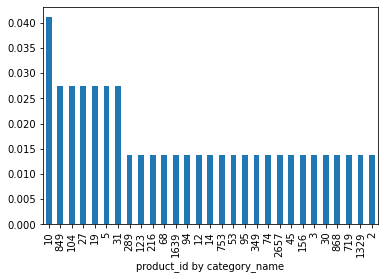

category_name by product_id,sum,1,0
count,32951.0,32341.000000,610.000000
freq,1.0,0.981488,0.018512


In [107]:
import matplotlib.pyplot as plt
ab, ba, _, _, _, _ = display_relation_arities(
    products, 'product_id',
    product_categories, 'category_name'
)
display(ab)
ab[ab.columns[1:30]].T.freq.plot.bar()
plt.show()
display(ba)

## 8th relationship : `seller|customer` → `geolocation`

99% of the geolocations of customer orders and 98% of those of sellers are referenced in the geolocations table, but 157 and 41 respectively are not.

### Reminder

In [108]:
import pandas as pd
display(discrete_stats(geolocations))
located_geolocations = pd.concat([
    geolocations[geolocations.columns[:3]],
    pd.Series(zip(
        geolocations.zip_code_prefix,
        geolocations.city,
        geolocations.state
    ), name='zcs')
], axis=1)
located_geolocations.columns.name = 'located_geolocations'
display(discrete_stats(located_geolocations))

,n,n_u,n_na,fr,vr
geolocation,,,,,
geolocation_id,1000163,1000163,0,1.0,1.000000
lat,1000163,717372,0,1.0,0.717255
lng,1000163,717615,0,1.0,0.717498
zip_code_prefix,1000163,19015,0,1.0,0.019012
city,1000163,5228,0,1.0,0.005227
state,1000163,27,0,1.0,0.000027


,n,n_u,n_na,fr,vr
located_geolocations,,,,,
geolocation_id,1000163,1000163,0,1.0,1.000000
lat,1000163,717372,0,1.0,0.717255
lng,1000163,717615,0,1.0,0.717498
zcs,1000163,19023,0,1.0,0.019020


In [109]:
import pandas as pd
display(discrete_stats(customer_orders))
located_customer_orders = pd.concat([
    customer_orders[customer_orders.columns[:2]],
    pd.Series(zip(
        customer_orders.zip_code_prefix,
        customer_orders.city,
        customer_orders.state
    ), name='zcs')
], axis=1)
located_customer_orders.columns.name = 'located_customer_orders'
display(discrete_stats(located_customer_orders))

,n,n_u,n_na,fr,vr
customers_orders,,,,,
order_id,99441,99441,0,1.0,1.000000
customer_id,99441,96096,0,1.0,0.966362
zip_code_prefix,99441,14994,0,1.0,0.150783
city,99441,3892,0,1.0,0.039139
state,99441,27,0,1.0,0.000272


,n,n_u,n_na,fr,vr
located_customer_orders,,,,,
order_id,99441,99441,0,1.0,1.000000
customer_id,99441,96096,0,1.0,0.966362
zcs,99441,14994,0,1.0,0.150783


In [111]:
import pandas as pd
display(discrete_stats(sellers))
located_sellers = pd.concat([
    sellers.seller_id,
    pd.Series(zip(
        sellers.zip_code_prefix,
        sellers.city,
        sellers.state
    ), name='zcs')
], axis=1)
located_sellers.columns.name = 'located_sellers'
display(discrete_stats(located_sellers))

,n,n_u,n_na,fr,vr
sellers,,,,,
seller_id,3095,3095,0,1.0,1.000000
zip_code_prefix,3095,2246,0,1.0,0.725687
city,3095,551,0,1.0,0.178029
state,3095,23,0,1.0,0.007431


,n,n_u,n_na,fr,vr
located_sellers,,,,,
seller_id,3095,3095,0,1.0,1.000000
zcs,3095,2264,0,1.0,0.731502


### Free electrons

In [112]:
print_out_of_intersection(located_geolocations, located_customer_orders, 'zcs')

|located_geolocations.zcs| : 19023
|located_customer_orders.zcs| : 14994
|located_geolocations.zcs \ located_customer_orders.zcs| : 4186 (22.005%)
|located_customer_orders.zcs \ located_geolocations.zcs| : 157 (1.047%)


In [113]:
print_out_of_intersection(located_geolocations, located_sellers, 'zcs')

|located_geolocations.zcs| : 19023
|located_sellers.zcs| : 2264
|located_geolocations.zcs \ located_sellers.zcs| : 16800 (88.314%)
|located_sellers.zcs \ located_geolocations.zcs| : 41 (1.811%)


In [114]:
print_out_of_intersection(located_customer_orders, located_sellers, 'zcs')

|located_customer_orders.zcs| : 14994
|located_sellers.zcs| : 2264
|located_customer_orders.zcs \ located_sellers.zcs| : 12848 (85.688%)
|located_sellers.zcs \ located_customer_orders.zcs| : 118 (5.212%)


# Merge all order tables in one

When we look more closely, then step back on the relational schema of the Olist tables, we notice that it could be reduced to two main tables, which correspond to two main grain levels: the `order` and the `order item`.

Each order is an aggregation of order items (the set of orders is therefore a partition of the set of order items).

Let's start by merging the `orders`, `customer_orders`, `order_payments` and `order_reviews` tables into a single `order_details` table.

## Inventory

We have 9 tables, connected by 7 relations.

We encode these  tables using the following monograms:
1. **A**: `categories`
2. **U**: `products`
3. **S**: `sellers`
4. **I**: `order_items`
5. **O**: `orders`
6. **R**: `order_reviews`
7. **C**: `customer_orders`
8. **P**: `order_payments`

For each of the 7 relations, we can perform a first intermediate merge, coded according to the orientation of the relation:
1. **AU**: [U → A] : `categorized_products`
2. **IU**: [I → P] : `products_sales`
3. **IS**: [I → S] : `sellers_sales`
4. **IO**: [I → O] : `order_details`
5. **OR**: [R → O] : `order_reviews`
6. **CO**: [C → O] : `customer_orders`
7. **OP**: [M → O] : `order_payments`

We then proceed to two higher level junctions, around the two pivot tables, `orders_items` and `orders`:
* **COPR**: [(C, P, R) → O] : `order_details`
* **ISAU**: [I → (S, (U → A))] : `sales_details`

We finally proceed to a last join between the two intermediate join tables, `COPR` and `ISAU`, to produce the `all` table.

This last table contains all the information of the dataset, in a pure relational format.

In [1]:
from pepper_commons import discrete_stats
from olist_commons import (
    # get_categorized_products,
    # get_products_sales,
    # get_sellers_sales,
    # get_sales,
    # get_orders_reviews,
    # get_customers_orders,
    # get_orders_payments,
    get_customers_orders_payments,
    get_customers_orders_reviews,
    get_orders_payments_reviews,
    get_order_details,
    get_sales_details,
    get_all_in_one
)

## Coupling tables

### **AU**: `'categorized_products'` table

In [1]:
from olist_commons import get_categorized_products
from pepper_commons import discrete_stats

cp = get_categorized_products()
display(discrete_stats(cp.reset_index()))

n    n_u  n_na  Filling rate  \
object     features                                               
_ident_    category_name       32341     73   610      0.981488   
           product_id          32951  32951     0      1.000000   
categories category_name_EN    32341     73   610      0.981488   
           products_count      32341     65   610      0.981488   
products   name_lenght         32341     66   610      0.981488   
           description_lenght  32341   2960   610      0.981488   
           photos_qty          32341     19   610      0.981488   
           weight_g            32949   2204     2      0.999939   
           length_cm           32949     99     2      0.999939   
           height_cm           32949    102     2      0.999939   
           width_cm            32949     95     2      0.999939   

                               Shannon entropy   dtypes  
object     features                                      
_ident_    category_name              0.002257   object  
           product_id                 1.000000   object  
categories category_name_EN           0.002257   object  
           products_count             0.002010  float64  
products   name_lenght                0.002041   object  
           description_lenght         0.091525   object  
           photos_qty                 0.000587   object  
           weight_g                   0.066891  float64  
           length_cm                  0.003005  float64  
           height_cm                  0.003096  float64  
           width_cm                   0.002883  float64

With filtering :

In [4]:
from olist_commons import get_categorized_products
from olist_commons import (
    index_of_product_categories_by_products_count,
    index_of_dimensioned_products
)
from pepper_commons import discrete_stats

ps = get_categorized_products(
    categories_index=index_of_product_categories_by_products_count(
        min_count=100,
        max_count=200
    ),
    products_index=index_of_dimensioned_products()
)
display(discrete_stats(ps.reset_index()))

n   n_u  n_na  Filling rate  \
object     features                                             
_ident_    category_name       1011     8     0           1.0   
           product_id          1011  1011     0           1.0   
categories category_name_EN    1011     8     0           1.0   
           products_count      1011     7     0           1.0   
products   name_lenght         1011    49     0           1.0   
           description_lenght  1011   617     0           1.0   
           photos_qty          1011    12     0           1.0   
           weight_g            1011   286     0           1.0   
           length_cm           1011    69     0           1.0   
           height_cm           1011    62     0           1.0   
           width_cm            1011    58     0           1.0   

                               Shannon entropy   dtypes  
object     features                                      
_ident_    category_name              0.007913   object  
           product_id                 1.000000   object  
categories category_name_EN           0.007913   object  
           products_count             0.006924  float64  
products   name_lenght                0.048467   object  
           description_lenght         0.610287   object  
           photos_qty                 0.011869   object  
           weight_g                   0.282888  float64  
           length_cm                  0.068249  float64  
           height_cm                  0.061325  float64  
           width_cm                   0.057369  float64

### **IU**: `'products_sales'` table

In [2]:
from olist_commons import get_products_sales
from pepper_commons import discrete_stats

ps = get_products_sales()
display(discrete_stats(ps.reset_index()))

n    n_u  n_na  Filling rate  \
object   features                                                 
_ident_  order_id             112650  98666     0       1.00000   
         order_item_id        112650     21     0       1.00000   
         product_id           112650  32951     0       1.00000   
products category_name        111047     73  1603       0.98577   
         name_lenght          111047     66  1603       0.98577   
         description_lenght   111047   2960  1603       0.98577   
         photos_qty           111047     19  1603       0.98577   
         weight_g             112632   2204    18       0.99984   
         length_cm            112632     99    18       0.99984   
         height_cm            112632    102    18       0.99984   
         width_cm             112632     95    18       0.99984   
sales    seller_id            112650   3095     0       1.00000   
         shipping_limit_date  112650  93318     0       1.00000   
         price                112650   5968     0       1.00000   
         freight_value        112650   6999     0       1.00000   

                              Shannon entropy          dtypes  
object   features                                              
_ident_  order_id                    0.875863          object  
         order_item_id               0.000186          object  
         product_id                  0.292508          object  
products category_name               0.000657          object  
         name_lenght                 0.000594          object  
         description_lenght          0.026655          object  
         photos_qty                  0.000171          object  
         weight_g                    0.019568         float64  
         length_cm                   0.000879         float64  
         height_cm                   0.000906         float64  
         width_cm                    0.000843         float64  
sales    seller_id                   0.027474          object  
         shipping_limit_date         0.828389  datetime64[ns]  
         price                       0.052978         float64  
         freight_value               0.062130         float64

With filtering :

In [3]:
from olist_commons import get_products_sales
from olist_commons import (
    index_of_delivered_orders,
    index_of_dimensioned_products,
    index_of_sellers_from_state
)
from pepper_commons import discrete_stats

ps = get_products_sales(
    orders_index=index_of_delivered_orders(),
    products_index=index_of_dimensioned_products(),
    sellers_index=index_of_sellers_from_state('SP')
)
display(discrete_stats(ps.reset_index()))

n    n_u  n_na  Filling rate  \
object   features                                                
_ident_  order_id             78587  68626     0      1.000000   
         order_item_id        78587     21     0      1.000000   
         product_id           78587  22411     0      1.000000   
products category_name        77500     73  1087      0.986168   
         name_lenght          77500     65  1087      0.986168   
         description_lenght   77500   2612  1087      0.986168   
         photos_qty           77500     19  1087      0.986168   
         weight_g             78587   1822     0      1.000000   
         length_cm            78587     97     0      1.000000   
         height_cm            78587    100     0      1.000000   
         width_cm             78587     89     0      1.000000   
sales    seller_id            78587   1769     0      1.000000   
         shipping_limit_date  78587  65864     0      1.000000   
         price                78587   4532     0      1.000000   
         freight_value        78587   5669     0      1.000000   

                              Shannon entropy          dtypes  
object   features                                              
_ident_  order_id                    0.873249          object  
         order_item_id               0.000267          object  
         product_id                  0.285174          object  
products category_name               0.000942          object  
         name_lenght                 0.000839          object  
         description_lenght          0.033703          object  
         photos_qty                  0.000245          object  
         weight_g                    0.023184         float64  
         length_cm                   0.001234         float64  
         height_cm                   0.001272         float64  
         width_cm                    0.001133         float64  
sales    seller_id                   0.022510          object  
         shipping_limit_date         0.838103  datetime64[ns]  
         price                       0.057669         float64  
         freight_value               0.072137         float64

### **IS**: `'sellers_sales'` table

In [5]:
from olist_commons import get_sellers_sales
from pepper_commons import discrete_stats

ss = get_sellers_sales()
display(discrete_stats(ss.reset_index()))

n    n_u  n_na  Filling rate  \
object  features                                                 
_ident_ order_id             112650  98666     0           1.0   
        order_item_id        112650     21     0           1.0   
        seller_id            112650   3095     0           1.0   
sellers zip_code_prefix      112650   2246     0           1.0   
        city                 112650    551     0           1.0   
        state                112650     23     0           1.0   
sales   product_id           112650  32951     0           1.0   
        shipping_limit_date  112650  93318     0           1.0   
        price                112650   5968     0           1.0   
        freight_value        112650   6999     0           1.0   

                             Shannon entropy          dtypes  
object  features                                              
_ident_ order_id                    0.875863          object  
        order_item_id               0.000186          object  
        seller_id                   0.027474          object  
sellers zip_code_prefix             0.019938          object  
        city                        0.004891          object  
        state                       0.000204          object  
sales   product_id                  0.292508          object  
        shipping_limit_date         0.828389  datetime64[ns]  
        price                       0.052978         float64  
        freight_value               0.062130         float64

With filtering :

In [6]:
from olist_commons import get_sellers_sales
from olist_commons import (
    index_of_delivered_orders,
    index_of_dimensioned_products,
    index_of_sellers_from_state
)
from pepper_commons import discrete_stats

ss = get_sellers_sales(
    orders_index=index_of_delivered_orders(),
    products_index=index_of_dimensioned_products(),
    sellers_index=index_of_sellers_from_state('SP')
)
display(discrete_stats(ss.reset_index()))

n    n_u  n_na  Filling rate  \
object  features                                                
_ident_ order_id             78587  68626     0           1.0   
        order_item_id        78587     21     0           1.0   
        seller_id            78587   1769     0           1.0   
sellers zip_code_prefix      78587   1281     0           1.0   
        city                 78587    219     0           1.0   
        state                78587      1     0           1.0   
sales   product_id           78587  22411     0           1.0   
        shipping_limit_date  78587  65864     0           1.0   
        price                78587   4532     0           1.0   
        freight_value        78587   5669     0           1.0   

                             Shannon entropy          dtypes  
object  features                                              
_ident_ order_id                    0.873249          object  
        order_item_id               0.000267          object  
        seller_id                   0.022510          object  
sellers zip_code_prefix             0.016300          object  
        city                        0.002787          object  
        state                       0.000013          object  
sales   product_id                  0.285174          object  
        shipping_limit_date         0.838103  datetime64[ns]  
        price                       0.057669         float64  
        freight_value               0.072137         float64

### **IO**: `'sales'` table

In [7]:
from olist_commons import get_sales
from pepper_commons import discrete_stats

s = get_sales()
display(discrete_stats(s.reset_index()))

n    n_u  n_na  Filling rate  \
object  features                                                     
_ident_ order_id                 113425  99441     0      1.000000   
        order_item_id            112650     21   775      0.993167   
sales   product_id               112650  32951   775      0.993167   
        seller_id                112650   3095   775      0.993167   
        shipping_limit_date      112650  93318   775      0.993167   
        price                    112650   5968   775      0.993167   
        freight_value            112650   6999   775      0.993167   
orders  status                   113425      8     0      1.000000   
        purchase_timestamp       113425  98875     0      1.000000   
        approved_at              113264  90733   161      0.998581   
        delivered_carrier_date   111457  81018  1968      0.982649   
        delivered_customer_date  110196  95664  3229      0.971532   
        estimated_delivery_date  113425    459     0      1.000000   

                                 Shannon entropy          dtypes  
object  features                                                  
_ident_ order_id                        0.876711          object  
        order_item_id                   0.000186          object  
sales   product_id                      0.292508          object  
        seller_id                       0.027474          object  
        shipping_limit_date             0.828389  datetime64[ns]  
        price                           0.052978         float64  
        freight_value                   0.062130         float64  
orders  status                          0.000071          object  
        purchase_timestamp              0.871721  datetime64[ns]  
        approved_at                     0.801075  datetime64[ns]  
        delivered_carrier_date          0.726899  datetime64[ns]  
        delivered_customer_date         0.868126  datetime64[ns]  
        estimated_delivery_date         0.004047  datetime64[ns]

With filtering:

In [8]:
from olist_commons import get_sales
from olist_commons import (
    index_of_delivered_orders,
    index_of_dimensioned_products,
    index_of_sellers_from_state
)
from pepper_commons import discrete_stats

s = get_sales(
    orders_index=index_of_delivered_orders(),
    products_index=index_of_dimensioned_products(),
    sellers_index=index_of_sellers_from_state('SP')
)
display(discrete_stats(s.reset_index()))

n    n_u  n_na  Filling rate  \
object  features                                                    
_ident_ order_id                 78587  68626     0      1.000000   
        order_item_id            78587     21     0      1.000000   
sales   product_id               78587  22411     0      1.000000   
        seller_id                78587   1769     0      1.000000   
        shipping_limit_date      78587  65864     0      1.000000   
        price                    78587   4532     0      1.000000   
        freight_value            78587   5669     0      1.000000   
orders  status                   78587      1     0      1.000000   
        purchase_timestamp       78587  68300     0      1.000000   
        approved_at              78574  64192    13      0.999835   
        delivered_carrier_date   78586  57625     1      0.999987   
        delivered_customer_date  78581  68206     6      0.999924   
        estimated_delivery_date  78587    437     0      1.000000   

                                 Shannon entropy          dtypes  
object  features                                                  
_ident_ order_id                        0.873249          object  
        order_item_id                   0.000267          object  
sales   product_id                      0.285174          object  
        seller_id                       0.022510          object  
        shipping_limit_date             0.838103  datetime64[ns]  
        price                           0.057669         float64  
        freight_value                   0.072137         float64  
orders  status                          0.000013          object  
        purchase_timestamp              0.869100  datetime64[ns]  
        approved_at                     0.816962  datetime64[ns]  
        delivered_carrier_date          0.733273  datetime64[ns]  
        delivered_customer_date         0.867971  datetime64[ns]  
        estimated_delivery_date         0.005561  datetime64[ns]

### **OR**: `'orders_reviews'` table

In [9]:
from olist_commons import get_orders_reviews
from pepper_commons import discrete_stats

or_ = get_orders_reviews()
display(discrete_stats(or_.reset_index()))

n    n_u   n_na  Filling rate  \
object  features                                                     
_ident_ order_id                 99992  99441      0      1.000000   
        review_id                99224  98410    768      0.992319   
orders  status                   99992      8      0      1.000000   
        purchase_timestamp       99992  98875      0      1.000000   
        approved_at              99831  90733    161      0.998390   
        delivered_carrier_date   98199  81018   1793      0.982069   
        delivered_customer_date  97005  95664   2987      0.970128   
        estimated_delivery_date  99992    459      0      1.000000   
reviews score                    99224      5    768      0.992319   
        comment_title            11568   4527  88424      0.115689   
        comment_message          40977  36159  59015      0.409803   
        creation_date            99224    636    768      0.992319   
        answer_timestamp         99224  98248    768      0.992319   

                                 Shannon entropy          dtypes  
object  features                                                  
_ident_ order_id                        0.994490          object  
        review_id                       0.991796          object  
orders  status                          0.000080          object  
        purchase_timestamp              0.988829  datetime64[ns]  
        approved_at                     0.908866  datetime64[ns]  
        delivered_carrier_date          0.825039  datetime64[ns]  
        delivered_customer_date         0.986176  datetime64[ns]  
        estimated_delivery_date         0.004590  datetime64[ns]  
reviews score                           0.000050         float64  
        comment_title                   0.391338          object  
        comment_message                 0.882422          object  
        creation_date                   0.006410  datetime64[ns]  
        answer_timestamp                0.990164  datetime64[ns]

With filtering:

In [2]:
from olist_commons import get_orders_reviews
from olist_commons import (
    index_of_delivered_orders,
    index_of_reviews_by_score
)
from pepper_commons import discrete_stats

or_ = get_orders_reviews(
    orders_index=index_of_delivered_orders(),
    reviews_index=index_of_reviews_by_score(
        min_score=4,
        max_score=5
    )
)
display(discrete_stats(or_.reset_index()))

n    n_u   n_na  Filling rate  \
object  features                                                     
_ident_ order_id                 76053  75707      0      1.000000   
        review_id                76053  75536      0      1.000000   
orders  status                   76053      1      0      1.000000   
        purchase_timestamp       76053  75351      0      1.000000   
        approved_at              76041  70387     12      0.999842   
        delivered_carrier_date   76051  64095      2      0.999974   
        delivered_customer_date  76046  75178      7      0.999908   
        estimated_delivery_date  76053    442      0      1.000000   
reviews score                    76053      2      0      1.000000   
        comment_title             8358   2675  67695      0.109897   
        comment_message          26366  22392  49687      0.346679   
        creation_date            76053    619      0      1.000000   
        answer_timestamp         76053  75436      0      1.000000   

                                 Shannon entropy          dtypes  
object  features                                                  
_ident_ order_id                        0.995451          object  
        review_id                       0.993202          object  
orders  status                          0.000013          object  
        purchase_timestamp              0.990770  datetime64[ns]  
        approved_at                     0.925645  datetime64[ns]  
        delivered_carrier_date          0.842790  datetime64[ns]  
        delivered_customer_date         0.988586  datetime64[ns]  
        estimated_delivery_date         0.005812  datetime64[ns]  
reviews score                           0.000026         float64  
        comment_title                   0.320053          object  
        comment_message                 0.849276          object  
        creation_date                   0.008139  datetime64[ns]  
        answer_timestamp                0.991887  datetime64[ns]

### **CO**: `'customers_orders'` table

In [7]:
from olist_commons import get_customers_orders
from pepper_commons import discrete_stats

co = get_customers_orders()
display(discrete_stats(co.reset_index()))

n    n_u  n_na  Filling rate  \
object    features                                                    
_ident_   order_id                 99441  99441     0      1.000000   
          customer_id              99441  96096     0      1.000000   
customers zip_code_prefix          99441  14994     0      1.000000   
          city                     99441   3892     0      1.000000   
          state                    99441     27     0      1.000000   
orders    status                   99441      8     0      1.000000   
          purchase_timestamp       99441  98875     0      1.000000   
          approved_at              99281  90733   160      0.998391   
          delivered_carrier_date   97658  81018  1783      0.982070   
          delivered_customer_date  96476  95664  2965      0.970183   
          estimated_delivery_date  99441    459     0      1.000000   

                                   Shannon entropy          dtypes  
object    features                                                  
_ident_   order_id                        1.000000          object  
          customer_id                     0.966362          object  
customers zip_code_prefix                 0.150783          object  
          city                            0.039139          object  
          state                           0.000272          object  
orders    status                          0.000080          object  
          purchase_timestamp              0.994308  datetime64[ns]  
          approved_at                     0.913901  datetime64[ns]  
          delivered_carrier_date          0.829609  datetime64[ns]  
          delivered_customer_date         0.991583  datetime64[ns]  
          estimated_delivery_date         0.004616  datetime64[ns]

With filtering:

In [2]:
from olist_commons import get_customers_orders
from olist_commons import (
    index_of_delivered_orders,
    index_of_sedentary_customers
)
from pepper_commons import discrete_stats

co = get_customers_orders(
    orders_index=index_of_delivered_orders(),
    customers_index=index_of_sedentary_customers()
)
display(discrete_stats(co.reset_index()))

n    n_u  n_na  Filling rate  \
object    features                                                    
_ident_   order_id                 96478  96478     0      1.000000   
          customer_id              96478  93358     0      1.000000   
customers zip_code_prefix          96478  14889     0      1.000000   
          city                     96478   3864     0      1.000000   
          state                    96478     27     0      1.000000   
orders    status                   96478      1     0      1.000000   
          purchase_timestamp       96478  95956     0      1.000000   
          approved_at              96464  88274    14      0.999855   
          delivered_carrier_date   96476  80106     2      0.999979   
          delivered_customer_date  96470  95658     8      0.999917   
          estimated_delivery_date  96478    445     0      1.000000   

                                   Shannon entropy          dtypes  
object    features                                                  
_ident_   order_id                        1.000000          object  
          customer_id                     0.967661          object  
customers zip_code_prefix                 0.154325          object  
          city                            0.040051          object  
          state                           0.000280          object  
orders    status                          0.000010          object  
          purchase_timestamp              0.994589  datetime64[ns]  
          approved_at                     0.915098  datetime64[ns]  
          delivered_carrier_date          0.830320  datetime64[ns]  
          delivered_customer_date         0.991583  datetime64[ns]  
          estimated_delivery_date         0.004612  datetime64[ns]

### **OP**: `'orders_payments'` table

In [8]:
from olist_commons import get_orders_payments
from pepper_commons import discrete_stats

op = get_orders_payments()
display(discrete_stats(op.reset_index()))

n    n_u  n_na  Filling rate  \
object   features                                                     
_ident_  order_id                 103887  99441     0      1.000000   
         sequential               103886     29     1      0.999990   
payments type                     103886      5     1      0.999990   
         installments             103886     24     1      0.999990   
         value                    103886  29077     1      0.999990   
orders   status                   103887      8     0      1.000000   
         purchase_timestamp       103887  98875     0      1.000000   
         approved_at              103712  90733   175      0.998315   
         delivered_carrier_date   101999  81018  1888      0.981826   
         delivered_customer_date  100755  95664  3132      0.969852   
         estimated_delivery_date  103887    459     0      1.000000   

                                  Shannon entropy          dtypes  
object   features                                                  
_ident_  order_id                        0.957203          object  
         sequential                      0.000279          object  
payments type                            0.000048          object  
         installments                    0.000231          object  
         value                           0.279893         float64  
orders   status                          0.000077          object  
         purchase_timestamp              0.951755  datetime64[ns]  
         approved_at                     0.874855  datetime64[ns]  
         delivered_carrier_date          0.794302  datetime64[ns]  
         delivered_customer_date         0.949471  datetime64[ns]  
         estimated_delivery_date         0.004418  datetime64[ns]

With filtering:

In [3]:
from olist_commons import get_orders_payments
from olist_commons import index_of_delivered_orders
from pepper_commons import discrete_stats

op = get_orders_payments(
    orders_index=index_of_delivered_orders()
)
display(discrete_stats(op.reset_index()))

n    n_u  n_na  Filling rate  \
object   features                                                     
_ident_  order_id                 100757  96478     0      1.000000   
         sequential               100756     26     1      0.999990   
payments type                     100756      4     1      0.999990   
         installments             100756     24     1      0.999990   
         value                    100756  28547     1      0.999990   
orders   status                   100757      1     0      1.000000   
         purchase_timestamp       100757  95956     0      1.000000   
         approved_at              100743  88274    14      0.999861   
         delivered_carrier_date   100755  80106     2      0.999980   
         delivered_customer_date  100749  95658     8      0.999921   
         estimated_delivery_date  100757    445     0      1.000000   

                                  Shannon entropy          dtypes  
object   features                                                  
_ident_  order_id                        0.957531          object  
         sequential                      0.000258          object  
payments type                            0.000040          object  
         installments                    0.000238          object  
         value                           0.283328         float64  
orders   status                          0.000010          object  
         purchase_timestamp              0.952351  datetime64[ns]  
         approved_at                     0.876230  datetime64[ns]  
         delivered_carrier_date          0.795057  datetime64[ns]  
         delivered_customer_date         0.949468  datetime64[ns]  
         estimated_delivery_date         0.004417  datetime64[ns]

## 3-Merges

### **COP**: `'customers_orders_payments'` table

In [9]:
from olist_commons import get_customers_orders_payments
from pepper_commons import discrete_stats

cop = get_customers_orders_payments()
display(discrete_stats(cop.reset_index()))

n    n_u  n_na  Filling rate  \
object    features                                                     
_ident_   order_id                 103887  99441     0      1.000000   
          customer_id              103887  96096     0      1.000000   
          sequential               103886     29     1      0.999990   
customers zip_code_prefix          103887  14994     0      1.000000   
          city                     103887   3892     0      1.000000   
          state                    103887     27     0      1.000000   
orders    status                   103887      8     0      1.000000   
          purchase_timestamp       103887  98875     0      1.000000   
          approved_at              103712  90733   175      0.998315   
          delivered_carrier_date   101999  81018  1888      0.981826   
          delivered_customer_date  100755  95664  3132      0.969852   
          estimated_delivery_date  103887    459     0      1.000000   
payments  type                     103886      5     1      0.999990   
          installments             103886     24     1      0.999990   
          value                    103886  29077     1      0.999990   

                                   Shannon entropy          dtypes  
object    features                                                  
_ident_   order_id                        0.957203          object  
          customer_id                     0.925005          object  
          sequential                      0.000279          object  
customers zip_code_prefix                 0.144330          object  
          city                            0.037464          object  
          state                           0.000260          object  
orders    status                          0.000077          object  
          purchase_timestamp              0.951755  datetime64[ns]  
          approved_at                     0.874855  datetime64[ns]  
          delivered_carrier_date          0.794302  datetime64[ns]  
          delivered_customer_date         0.949471  datetime64[ns]  
          estimated_delivery_date         0.004418  datetime64[ns]  
payments  type                            0.000048          object  
          installments                    0.000231          object  
          value                           0.279893         float64

With filtering:

In [3]:
from olist_commons import get_customers_orders_payments
from olist_commons import (
    index_of_delivered_orders,
    index_of_sedentary_customers,
    index_of_reviews_by_score
)
from pepper_commons import discrete_stats

cop = get_customers_orders_payments(
    orders_index=index_of_delivered_orders(),
    customers_index=index_of_sedentary_customers()
)
display(discrete_stats(cop.reset_index()))

n    n_u  n_na  Filling rate  \
object    features                                                     
_ident_   order_id                 100757  96478     0      1.000000   
          customer_id              100757  93358     0      1.000000   
          sequential               100756     26     1      0.999990   
customers zip_code_prefix          100757  14889     0      1.000000   
          city                     100757   3864     0      1.000000   
          state                    100757     27     0      1.000000   
orders    status                   100757      1     0      1.000000   
          purchase_timestamp       100757  95956     0      1.000000   
          approved_at              100743  88274    14      0.999861   
          delivered_carrier_date   100755  80106     2      0.999980   
          delivered_customer_date  100749  95658     8      0.999921   
          estimated_delivery_date  100757    445     0      1.000000   
payments  type                     100756      4     1      0.999990   
          installments             100756     24     1      0.999990   
          value                    100756  28547     1      0.999990   

                                   Shannon entropy          dtypes  
object    features                                                  
_ident_   order_id                        0.957531          object  
          customer_id                     0.926566          object  
          sequential                      0.000258          object  
customers zip_code_prefix                 0.147771          object  
          city                            0.038350          object  
          state                           0.000268          object  
orders    status                          0.000010          object  
          purchase_timestamp              0.952351  datetime64[ns]  
          approved_at                     0.876230  datetime64[ns]  
          delivered_carrier_date          0.795057  datetime64[ns]  
          delivered_customer_date         0.949468  datetime64[ns]  
          estimated_delivery_date         0.004417  datetime64[ns]  
payments  type                            0.000040          object  
          installments                    0.000238          object  
          value                           0.283328         float64

### **COR**: `'customers_orders_reviews'` table

In [10]:
from olist_commons import get_customers_orders_reviews
from pepper_commons import discrete_stats

cor = get_customers_orders_reviews()
display(discrete_stats(cor.reset_index()))

n    n_u   n_na  Filling rate  \
object    features                                                     
_ident_   order_id                 99992  99441      0      1.000000   
          customer_id              99992  96096      0      1.000000   
          review_id                99224  98410    768      0.992319   
customers zip_code_prefix          99992  14994      0      1.000000   
          city                     99992   3892      0      1.000000   
          state                    99992     27      0      1.000000   
orders    status                   99992      8      0      1.000000   
          purchase_timestamp       99992  98875      0      1.000000   
          approved_at              99831  90733    161      0.998390   
          delivered_carrier_date   98199  81018   1793      0.982069   
          delivered_customer_date  97005  95664   2987      0.970128   
          estimated_delivery_date  99992    459      0      1.000000   
reviews   score                    99224      5    768      0.992319   
          comment_title            11568   4527  88424      0.115689   
          comment_message          40977  36159  59015      0.409803   
          creation_date            99224    636    768      0.992319   
          answer_timestamp         99224  98248    768      0.992319   

                                   Shannon entropy          dtypes  
object    features                                                  
_ident_   order_id                        0.994490          object  
          customer_id                     0.961037          object  
          review_id                       0.991796          object  
customers zip_code_prefix                 0.149952          object  
          city                            0.038923          object  
          state                           0.000270          object  
orders    status                          0.000080          object  
          purchase_timestamp              0.988829  datetime64[ns]  
          approved_at                     0.908866  datetime64[ns]  
          delivered_carrier_date          0.825039  datetime64[ns]  
          delivered_customer_date         0.986176  datetime64[ns]  
          estimated_delivery_date         0.004590  datetime64[ns]  
reviews   score                           0.000050         float64  
          comment_title                   0.391338          object  
          comment_message                 0.882422          object  
          creation_date                   0.006410  datetime64[ns]  
          answer_timestamp                0.990164  datetime64[ns]

With filtering:

In [2]:
from olist_commons import get_customers_orders_reviews
from olist_commons import (
    index_of_delivered_orders,
    index_of_sedentary_customers,
    index_of_reviews_by_score
)
from pepper_commons import discrete_stats

cor = get_customers_orders_reviews(
    orders_index=index_of_delivered_orders(),
    customers_index=index_of_sedentary_customers(),
    reviews_index=index_of_reviews_by_score(
        min_score=4,
        max_score=5
    )
)
display(discrete_stats(cor.reset_index()))

n    n_u   n_na  Filling rate  \
object    features                                                     
_ident_   order_id                 76053  75707      0      1.000000   
          customer_id              76053  73479      0      1.000000   
          review_id                76053  75536      0      1.000000   
customers zip_code_prefix          76053  14079      0      1.000000   
          city                     76053   3642      0      1.000000   
          state                    76053     27      0      1.000000   
orders    status                   76053      1      0      1.000000   
          purchase_timestamp       76053  75351      0      1.000000   
          approved_at              76041  70387     12      0.999842   
          delivered_carrier_date   76051  64095      2      0.999974   
          delivered_customer_date  76046  75178      7      0.999908   
          estimated_delivery_date  76053    442      0      1.000000   
reviews   score                    76053      2      0      1.000000   
          comment_title             8358   2675  67695      0.109897   
          comment_message          26366  22392  49687      0.346679   
          creation_date            76053    619      0      1.000000   
          answer_timestamp         76053  75436      0      1.000000   

                                   Shannon entropy          dtypes  
object    features                                                  
_ident_   order_id                        0.995451          object  
          customer_id                     0.966155          object  
          review_id                       0.993202          object  
customers zip_code_prefix                 0.185121          object  
          city                            0.047888          object  
          state                           0.000355          object  
orders    status                          0.000013          object  
          purchase_timestamp              0.990770  datetime64[ns]  
          approved_at                     0.925645  datetime64[ns]  
          delivered_carrier_date          0.842790  datetime64[ns]  
          delivered_customer_date         0.988586  datetime64[ns]  
          estimated_delivery_date         0.005812  datetime64[ns]  
reviews   score                           0.000026         float64  
          comment_title                   0.320053          object  
          comment_message                 0.849276          object  
          creation_date                   0.008139  datetime64[ns]  
          answer_timestamp                0.991887  datetime64[ns]

### **OPR**: `'orders_payments_reviews'` table

In [11]:
from olist_commons import get_orders_payments_reviews
from pepper_commons import discrete_stats

opr = get_orders_payments_reviews()
display(discrete_stats(opr.reset_index()))

n    n_u   n_na  Filling rate  \
object   features                                                      
_ident_  order_id                 104478  99441      0      1.000000   
         sequential               104477     29      1      0.999990   
         review_id                103678  98410    800      0.992343   
orders   status                   104478      8      0      1.000000   
         purchase_timestamp       104478  98875      0      1.000000   
         approved_at              104302  90733    176      0.998315   
         delivered_carrier_date   102580  81018   1898      0.981833   
         delivered_customer_date  101324  95664   3154      0.969812   
         estimated_delivery_date  104478    459      0      1.000000   
payments type                     104477      5      1      0.999990   
         installments             104477     24      1      0.999990   
         value                    104477  29077      1      0.999990   
reviews  score                    103678      5    800      0.992343   
         comment_title             11996   4527  92482      0.114818   
         comment_message           42816  36159  61662      0.409809   
         creation_date            103678    636    800      0.992343   
         answer_timestamp         103678  98248    800      0.992343   

                                  Shannon entropy          dtypes  
object   features                                                  
_ident_  order_id                        0.951789          object  
         sequential                      0.000278          object  
         review_id                       0.949189          object  
orders   status                          0.000077          object  
         purchase_timestamp              0.946371  datetime64[ns]  
         approved_at                     0.869907  datetime64[ns]  
         delivered_carrier_date          0.789803  datetime64[ns]  
         delivered_customer_date         0.944140  datetime64[ns]  
         estimated_delivery_date         0.004393  datetime64[ns]  
payments type                            0.000048          object  
         installments                    0.000230          object  
         value                           0.278310         float64  
reviews  score                           0.000048         float64  
         comment_title                   0.377376          object  
         comment_message                 0.844521          object  
         creation_date                   0.006134  datetime64[ns]  
         answer_timestamp                0.947626  datetime64[ns]

With filtering:

In [1]:
from olist_commons import get_orders_payments_reviews
from olist_commons import (
    index_of_delivered_orders,
    index_of_reviews_by_score
)
from pepper_commons import discrete_stats

opr = get_orders_payments_reviews(
    orders_index=index_of_delivered_orders(),
    reviews_index=index_of_reviews_by_score(
        min_score=4,
        max_score=5
    )
)
display(discrete_stats(opr.reset_index()))

n    n_u   n_na  Filling rate  \
object   features                                                     
_ident_  order_id                 79395  75707      0      1.000000   
         sequential               79395     26      0      1.000000   
         review_id                79395  75536      0      1.000000   
orders   status                   79395      1      0      1.000000   
         purchase_timestamp       79395  75351      0      1.000000   
         approved_at              79383  70387     12      0.999849   
         delivered_carrier_date   79393  64095      2      0.999975   
         delivered_customer_date  79388  75178      7      0.999912   
         estimated_delivery_date  79395    442      0      1.000000   
payments type                     79395      4      0      1.000000   
         installments             79395     22      0      1.000000   
         value                    79395  25006      0      1.000000   
reviews  score                    79395      2      0      1.000000   
         comment_title             8662   2675  70733      0.109100   
         comment_message          27515  22392  51880      0.346558   
         creation_date            79395    619      0      1.000000   
         answer_timestamp         79395  75436      0      1.000000   

                                  Shannon entropy          dtypes  
object   features                                                  
_ident_  order_id                        0.953549          object  
         sequential                      0.000327          object  
         review_id                       0.951395          object  
orders   status                          0.000013          object  
         purchase_timestamp              0.949065  datetime64[ns]  
         approved_at                     0.886676  datetime64[ns]  
         delivered_carrier_date          0.807313  datetime64[ns]  
         delivered_customer_date         0.946969  datetime64[ns]  
         estimated_delivery_date         0.005567  datetime64[ns]  
payments type                            0.000050          object  
         installments                    0.000277          object  
         value                           0.314957         float64  
reviews  score                           0.000025         float64  
         comment_title                   0.308820          object  
         comment_message                 0.813811          object  
         creation_date                   0.007796  datetime64[ns]  
         answer_timestamp                0.950135  datetime64[ns]

## Synthetic tables (4-Merges)

### **COPR**: `'order_details'` table

In [1]:
from olist_commons import get_order_details
from pepper_commons import discrete_stats

od = get_order_details()
display(discrete_stats(od.reset_index()))

n    n_u   n_na  Filling rate  \
object    features                                                      
_ident_   order_id                 104478  99441      0      1.000000   
          customer_id              104478  96096      0      1.000000   
          sequential               104477     29      1      0.999990   
          review_id                103678  98410    800      0.992343   
customers zip_code_prefix          104478  14994      0      1.000000   
          city                     104478   3892      0      1.000000   
          state                    104478     27      0      1.000000   
orders    status                   104478      8      0      1.000000   
          purchase_timestamp       104478  98875      0      1.000000   
          approved_at              104302  90733    176      0.998315   
          delivered_carrier_date   102580  81018   1898      0.981833   
          delivered_customer_date  101324  95664   3154      0.969812   
          estimated_delivery_date  104478    459      0      1.000000   
payments  type                     104477      5      1      0.999990   
          installments             104477     24      1      0.999990   
          value                    104477  29077      1      0.999990   
reviews   score                    103678      5    800      0.992343   
          comment_title             11996   4527  92482      0.114818   
          comment_message           42816  36159  61662      0.409809   
          creation_date            103678    636    800      0.992343   
          answer_timestamp         103678  98248    800      0.992343   

                                   Shannon entropy          dtypes  
object    features                                                  
_ident_   order_id                        0.951789          object  
          customer_id                     0.919773          object  
          sequential                      0.000278          object  
          review_id                       0.949189          object  
customers zip_code_prefix                 0.143513          object  
          city                            0.037252          object  
          state                           0.000258          object  
orders    status                          0.000077          object  
          purchase_timestamp              0.946371  datetime64[ns]  
          approved_at                     0.869907  datetime64[ns]  
          delivered_carrier_date          0.789803  datetime64[ns]  
          delivered_customer_date         0.944140  datetime64[ns]  
          estimated_delivery_date         0.004393  datetime64[ns]  
payments  type                            0.000048          object  
          installments                    0.000230          object  
          value                           0.278310         float64  
reviews   score                           0.000048         float64  
          comment_title                   0.377376          object  
          comment_message                 0.844521          object  
          creation_date                   0.006134  datetime64[ns]  
          answer_timestamp                0.947626  datetime64[ns]

With filtering:

In [2]:
from olist_commons import get_order_details
from olist_commons import (
    index_of_delivered_orders,
    index_of_sedentary_customers,
    index_of_reviews_by_score
)
from pepper_commons import discrete_stats

od = get_order_details(
    orders_index=index_of_delivered_orders(),
    customers_index=index_of_sedentary_customers(),
    reviews_index=index_of_reviews_by_score(
        min_score=4,
        max_score=5
    )
)
display(discrete_stats(od.reset_index()))

n    n_u   n_na  Filling rate  \
object    features                                                     
_ident_   order_id                 79395  75707      0      1.000000   
          customer_id              79395  73479      0      1.000000   
          sequential               79395     26      0      1.000000   
          review_id                79395  75536      0      1.000000   
customers zip_code_prefix          79395  14079      0      1.000000   
          city                     79395   3642      0      1.000000   
          state                    79395     27      0      1.000000   
orders    status                   79395      1      0      1.000000   
          purchase_timestamp       79395  75351      0      1.000000   
          approved_at              79383  70387     12      0.999849   
          delivered_carrier_date   79393  64095      2      0.999975   
          delivered_customer_date  79388  75178      7      0.999912   
          estimated_delivery_date  79395    442      0      1.000000   
payments  type                     79395      4      0      1.000000   
          installments             79395     22      0      1.000000   
          value                    79395  25006      0      1.000000   
reviews   score                    79395      2      0      1.000000   
          comment_title             8662   2675  70733      0.109100   
          comment_message          27515  22392  51880      0.346558   
          creation_date            79395    619      0      1.000000   
          answer_timestamp         79395  75436      0      1.000000   

                                   Shannon entropy          dtypes  
object    features                                                  
_ident_   order_id                        0.953549          object  
          customer_id                     0.925486          object  
          sequential                      0.000327          object  
          review_id                       0.951395          object  
customers zip_code_prefix                 0.177329          object  
          city                            0.045872          object  
          state                           0.000340          object  
orders    status                          0.000013          object  
          purchase_timestamp              0.949065  datetime64[ns]  
          approved_at                     0.886676  datetime64[ns]  
          delivered_carrier_date          0.807313  datetime64[ns]  
          delivered_customer_date         0.946969  datetime64[ns]  
          estimated_delivery_date         0.005567  datetime64[ns]  
payments  type                            0.000050          object  
          installments                    0.000277          object  
          value                           0.314957         float64  
reviews   score                           0.000025         float64  
          comment_title                   0.308820          object  
          comment_message                 0.813811          object  
          creation_date                   0.007796  datetime64[ns]  
          answer_timestamp                0.950135  datetime64[ns]

### **ISAU**: `'sales_details'` table

In [1]:
from olist_commons import get_sales_details
from pepper_commons import discrete_stats

sd = get_sales_details()
display(discrete_stats(sd.reset_index()))

n    n_u  n_na  Filling rate  \
object     features                                                 
_ident_    order_id             112650  98666     0       1.00000   
           order_item_id        112650     21     0       1.00000   
           product_id           112650  32951     0       1.00000   
           seller_id            112650   3095     0       1.00000   
sales      shipping_limit_date  112650  93318     0       1.00000   
           price                112650   5968     0       1.00000   
           freight_value        112650   6999     0       1.00000   
sellers    zip_code_prefix      112650   2246     0       1.00000   
           city                 112650    551     0       1.00000   
           state                112650     23     0       1.00000   
categories category_name        111047     73  1603       0.98577   
           category_name_EN     111047     73  1603       0.98577   
           products_count       111047     65  1603       0.98577   
products   name_lenght          111047     66  1603       0.98577   
           description_lenght   111047   2960  1603       0.98577   
           photos_qty           111047     19  1603       0.98577   
           weight_g             112632   2204    18       0.99984   
           length_cm            112632     99    18       0.99984   
           height_cm            112632    102    18       0.99984   
           width_cm             112632     95    18       0.99984   

                                Shannon entropy          dtypes  
object     features                                              
_ident_    order_id                    0.875863          object  
           order_item_id               0.000186          object  
           product_id                  0.292508          object  
           seller_id                   0.027474          object  
sales      shipping_limit_date         0.828389  datetime64[ns]  
           price                       0.052978         float64  
           freight_value               0.062130         float64  
sellers    zip_code_prefix             0.019938          object  
           city                        0.004891          object  
           state                       0.000204          object  
categories category_name               0.000657          object  
           category_name_EN            0.000657          object  
           products_count              0.000585         float64  
products   name_lenght                 0.000594          object  
           description_lenght          0.026655          object  
           photos_qty                  0.000171          object  
           weight_g                    0.019568         float64  
           length_cm                   0.000879         float64  
           height_cm                   0.000906         float64  
           width_cm                    0.000843         float64

With filtering:

In [2]:
from olist_commons import get_sales_details
from olist_commons import (
    index_of_delivered_orders,
    index_of_documented_products,
    index_of_sellers_from_state
)
from pepper_commons import discrete_stats

sd = get_sales_details(
    orders_index=index_of_delivered_orders(),
    products_index=index_of_documented_products(),
    sellers_index=index_of_sellers_from_state('SP')
)
display(discrete_stats(sd.reset_index()))

n    n_u  n_na  Filling rate  \
object     features                                                
_ident_    order_id             77500  67669     0           1.0   
           order_item_id        77500     21     0           1.0   
           product_id           77500  22035     0           1.0   
           seller_id            77500   1735     0           1.0   
sales      shipping_limit_date  77500  64982     0           1.0   
           price                77500   4485     0           1.0   
           freight_value        77500   5648     0           1.0   
sellers    zip_code_prefix      77500   1262     0           1.0   
           city                 77500    217     0           1.0   
           state                77500      1     0           1.0   
categories category_name        77500     73     0           1.0   
           category_name_EN     77500     73     0           1.0   
           products_count       77500     65     0           1.0   
products   name_lenght          77500     65     0           1.0   
           description_lenght   77500   2612     0           1.0   
           photos_qty           77500     19     0           1.0   
           weight_g             77500   1818     0           1.0   
           length_cm            77500     97     0           1.0   
           height_cm            77500    100     0           1.0   
           width_cm             77500     89     0           1.0   

                                Shannon entropy          dtypes  
object     features                                              
_ident_    order_id                    0.873148          object  
           order_item_id               0.000271          object  
           product_id                  0.284323          object  
           seller_id                   0.022387          object  
sales      shipping_limit_date         0.838477  datetime64[ns]  
           price                       0.057871         float64  
           freight_value               0.072877         float64  
sellers    zip_code_prefix             0.016284          object  
           city                        0.002800          object  
           state                       0.000013          object  
categories category_name               0.000942          object  
           category_name_EN            0.000942          object  
           products_count              0.000839         float64  
products   name_lenght                 0.000839          object  
           description_lenght          0.033703          object  
           photos_qty                  0.000245          object  
           weight_g                    0.023458         float64  
           length_cm                   0.001252         float64  
           height_cm                   0.001290         float64  
           width_cm                    0.001148         float64

### All in one : `all_in_one`

In [3]:
from olist_commons import get_all_in_one
from pepper_commons import discrete_stats

all = get_all_in_one()
display(discrete_stats(all.reset_index()))

n    n_u    n_na  Filling rate  \
object     features                                                       
_ident_    order_id                 119143  99441       0      1.000000   
           order_item_id            118310     21     833      0.993008   
           product_id               118310  32951     833      0.993008   
           seller_id                118310   3095     833      0.993008   
           customer_id              119143  96096       0      1.000000   
           sequential               119140     29       3      0.999975   
           review_id                118146  98410     997      0.991632   
sales      shipping_limit_date      118310  93318     833      0.993008   
           price                    118310   5968     833      0.993008   
           freight_value            118310   6999     833      0.993008   
sellers    zip_code_prefix          118310   2246     833      0.993008   
           city                     118310    551     833      0.993008   
           state                    118310     23     833      0.993008   
categories category_name            116601     73    2542      0.978664   
           category_name_EN         116601     73    2542      0.978664   
           products_count           116601     65    2542      0.978664   
products   name_lenght              116601     66    2542      0.978664   
           description_lenght       116601   2960    2542      0.978664   
           photos_qty               116601     19    2542      0.978664   
           weight_g                 118290   2204     853      0.992841   
           length_cm                118290     99     853      0.992841   
           height_cm                118290    102     853      0.992841   
           width_cm                 118290     95     853      0.992841   
customers  zip_code_prefix          119143  14994       0      1.000000   
           city                     119143   3892       0      1.000000   
           state                    119143     27       0      1.000000   
orders     status                   119143      8       0      1.000000   
           purchase_timestamp       119143  98875       0      1.000000   
           approved_at              118966  90733     177      0.998514   
           delivered_carrier_date   117057  81018    2086      0.982492   
           delivered_customer_date  115722  95664    3421      0.971287   
           estimated_delivery_date  119143    459       0      1.000000   
payments   type                     119140      5       3      0.999975   
           installments             119140     24       3      0.999975   
           value                    119140  29077       3      0.999975   
reviews    score                    118146      5     997      0.991632   
           comment_title             13989   4527  105154      0.117414   
           comment_message           50245  36159   68898      0.421720   
           creation_date            118146    636     997      0.991632   
           answer_timestamp         118146  98248     997      0.991632   

                                    Shannon entropy          dtypes  
object     features                                                  
_ident_    order_id                        0.834636          object  
           order_item_id                   0.000177          object  
           product_id                      0.278514          object  
           seller_id                       0.026160          object  
           customer_id                     0.806560          object  
           sequential                      0.000243          object  
           review_id                       0.832952          object  
sales      shipping_limit_date             0.788758  datetime64[ns]  
           price                           0.050444         float64  
           freight_value                   0.059158         float64  
sellers    zip_code_prefix                 0.01898

With filtering:

In [4]:
from olist_commons import get_all_in_one
from olist_commons import (
    index_of_delivered_orders,
    index_of_documented_products,
    index_of_sellers_from_state,
    index_of_sedentary_customers,
    index_of_reviews_by_score
)
from pepper_commons import discrete_stats

all = get_all_in_one(
    orders_index=index_of_delivered_orders(),
    products_index=index_of_documented_products(),
    sellers_index=index_of_sellers_from_state('SP'),
    customers_index=index_of_sedentary_customers(),
    reviews_index=index_of_reviews_by_score(
        min_score=4,
        max_score=5
    )
)
display(discrete_stats(all.reset_index()))

n    n_u   n_na  Filling rate  \
object     features                                                     
_ident_    order_id                 61297  52435      0      1.000000   
           order_item_id            61297     15      0      1.000000   
           product_id               61297  18759      0      1.000000   
           seller_id                61297   1654      0      1.000000   
           customer_id              61297  51127      0      1.000000   
           sequential               61297     26      0      1.000000   
           review_id                61297  52374      0      1.000000   
sales      shipping_limit_date      61297  50678      0      1.000000   
           price                    61297   4021      0      1.000000   
           freight_value            61297   4883      0      1.000000   
sellers    zip_code_prefix          61297   1213      0      1.000000   
           city                     61297    212      0      1.000000   
           state                    61297      1      0      1.000000   
categories category_name            61297     73      0      1.000000   
           category_name_EN         61297     73      0      1.000000   
           products_count           61297     65      0      1.000000   
products   name_lenght              61297     65      0      1.000000   
           description_lenght       61297   2532      0      1.000000   
           photos_qty               61297     18      0      1.000000   
           weight_g                 61297   1679      0      1.000000   
           length_cm                61297     96      0      1.000000   
           height_cm                61297     99      0      1.000000   
           width_cm                 61297     86      0      1.000000   
customers  zip_code_prefix          61297  12725      0      1.000000   
           city                     61297   3199      0      1.000000   
           state                    61297     27      0      1.000000   
orders     status                   61297      1      0      1.000000   
           purchase_timestamp       61297  52230      0      1.000000   
           approved_at              61287  49726     10      0.999837   
           delivered_carrier_date   61296  44828      1      0.999984   
           delivered_customer_date  61292  52185      5      0.999918   
           estimated_delivery_date  61297    434      0      1.000000   
payments   type                     61297      4      0      1.000000   
           installments             61297     21      0      1.000000   
           value                    61297  19190      0      1.000000   
reviews    score                    61297      2      0      1.000000   
           comment_title             6881   2049  54416      0.112257   
           comment_message          21520  15922  39777      0.351078   
           creation_date            61297    604      0      1.000000   
           answer_timestamp         61297  52317      0      1.000000   

                                    Shannon entropy          dtypes  
object     features                                                  
_ident_    order_id                        0.855425          object  
           order_item_id                   0.000245          object  
           product_id                      0.306035          object  
           seller_id                       0.026983          object  
           customer_id                     0.834086          object  
           sequential                      0.000424          object  
           review_id                       0.854430          object  
sales      shipping_limit_date             0.826762  datetime64[ns]  
           price                           0.065599         float64  
           freight_value                   0.079661         float64  
sellers    zip_code_prefix                 0.019789          object  
           city                            0.003459          ob

# Customer centric database : DB refactoring

There is no explicit table of (unique) **customers**. The table named `customers` is actually an extension of the `orders` table which specifies a customer identifier and the geolocation of the order.

However, the main challenge of the project is customer segmentation.

We fix it here.

This `customers` indexed-table is derived directly from the customer orders table and can be extended with numerous features that will enrich customer knowledge.

## Base tables

## Order count

Each `order_id` in `customer_orders` table denotes a single order.

To count the orders in the new `customers` table, we just need to measure the length of the user's order list, given in the `order_id` column.

Results :
* **97%** of customers only ordered once !
* **3%** ordered twice.
* And less than **0.25%** of customers ordered more than twice !
    * Some of these customers have ordered up to 7 times.
    * One customer ordered 9 times, and another 17 times.
* Any customer has ordered at least once (there is no leads = customers who never ordered).
* We verfiy that $\sum{n_c} = 96 096$ and $\sum{n_c n_o} = 99 441$

In [5]:
import pandas as pd
from olist_commons import get_customers
customers = get_customers()
order_count = pd.DataFrame(customers.order_id.apply(len).sort_values(ascending=False))
display(order_count)

,order_id
customer_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...
5657dfebff5868c4dc7e8355fea865c4,1
5657596addb4d7b07b32cd330614bdf8,1
5656eb169546146caeab56c3ffc3d268,1


In [6]:
import pandas as pd
count = order_count.order_id.value_counts().rename('n_c')
freq = order_count.order_id.value_counts(normalize=True).rename('%_c')
count_freq = pd.concat([count, freq], axis=1)
count_freq['n_c x n_o'] = count_freq.index * count_freq['n_c']
count_freq.loc['sum'] = count_freq.sum()
count_freq.index.name = 'n_o'
display(count_freq)

,n_c,%_c,n_c x n_o
n_o,,,
1,93099.0,0.968812,93099.0
2,2745.0,0.028565,5490.0
3,203.0,0.002112,609.0
4,30.0,0.000312,120.0
5,8.0,0.000083,40.0
6,6.0,0.000062,36.0
7,3.0,0.000031,21.0
17,1.0,0.000010,17.0
9,1.0,0.000010,9.0


## Customer order payments

To determine the 3 synthetic variables R, F and M, we need a join of the `customer_orders`, `orders` (dates) and `order_payments` (amounts) tables. The details of `order_items` are not relevant.

**⚠** The last validated purchase dates back to October 17, 2018 at 17:30:18. We are therefore working on an archive database that is 4 years and a quarter old. The recency must be calculated taking into account this parameter, and more particularly such as the distance upstream to this date (see `get_last_order_date()`).

In [7]:
from pepper_commons import discrete_stats
from olist_commons import (
    get_orders,
    get_customer_orders,
    get_order_payments,
)

orders = get_orders()
display(discrete_stats(orders.reset_index()))

customer_orders = get_customer_orders()
display(discrete_stats(customer_orders.reset_index()))

order_payments = get_order_payments()
display(discrete_stats(order_payments.reset_index()))

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
orders,,,,,,
order_id,99441,99441,0,1.000000,1.000000,object
status,99441,8,0,1.000000,0.000080,object
purchase_timestamp,99441,98875,0,1.000000,0.994308,datetime64[ns]
approved_at,99281,90733,160,0.998391,0.913901,datetime64[ns]
delivered_carrier_date,97658,81018,1783,0.982070,0.829609,datetime64[ns]
delivered_customer_date,96476,95664,2965,0.970183,0.991583,datetime64[ns]
estimated_delivery_date,99441,459,0,1.000000,0.004616,datetime64[ns]


,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
customers_orders,,,,,,
order_id,99441,99441,0,1.0,1.000000,object
customer_id,99441,96096,0,1.0,0.966362,object
zip_code_prefix,99441,14994,0,1.0,0.150783,object
city,99441,3892,0,1.0,0.039139,object
state,99441,27,0,1.0,0.000272,object


,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
order_payments,,,,,,
"(order_id, sequential)",103886,103886,0,1.0,1.000000,object
type,103886,5,0,1.0,0.000048,object
installments,103886,24,0,1.0,0.000231,object
value,103886,29077,0,1.0,0.279893,float64


### Order payments by order

Let's start by grouping the data from the order payments table into a summary with one order per line.

All information distributed over several rows (each identified by a `payment_sequential` ordinal key) in the raw table is grouped here in the form of tuples.

We complete with two synthetic features, the number of payments (`count`), and the total of payments (`sum`).

In [8]:
from olist_commons import get_order_payments
from pepper_commons import discrete_stats
op = get_order_payments()
display(discrete_stats(op.reset_index()))
display(op)

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
order_payments,,,,,,
"(order_id, sequential)",103886,103886,0,1.0,1.000000,object
type,103886,5,0,1.0,0.000048,object
installments,103886,24,0,1.0,0.000231,object
value,103886,29077,0,1.0,0.279893,float64


order_payments,type,installments,value
"(order_id, sequential)",,,
"(b81ef226f3fe1789b1e8b2acac839d17, 1)",credit_card,8,99.33
"(a9810da82917af2d9aefd1278f1dcfa0, 1)",credit_card,1,24.39
"(25e8ea4e93396b6fa0d3dd708e76c1bd, 1)",credit_card,1,65.71
"(ba78997921bbcdc1373bb41e913ab953, 1)",credit_card,8,107.78
"(42fdf880ba16b47b59251dd489d4441a, 1)",credit_card,2,128.45
...,...,...,...
"(0406037ad97740d563a178ecc7a2075c, 1)",boleto,1,363.31
"(7b905861d7c825891d6347454ea7863f, 1)",credit_card,2,96.80
"(32609bbb3dd69b3c066a6860554a77bf, 1)",credit_card,1,47.77


In [9]:
from olist_commons import get_order_payments_by_order
from pepper_commons import discrete_stats
op_by_o = get_order_payments_by_order()
display(discrete_stats(op_by_o.reset_index()))
display(op_by_o)

n    n_u  n_na  Filling rate  Shannon entropy  \
order_id             99441  99441     0       1.00000         1.000000   
customer_id          99441  96096     0       1.00000         0.966362   
value         count  99441     21     0       1.00000         0.000211   
              sum    99441  27979     0       1.00000         0.281363   
              min    99440  28312     1       0.99999         0.284714   
              max    99440  27744     1       0.99999         0.279002   
              mean   99440  29067     1       0.99999         0.292307   
purchase_date min    99441  98875     0       1.00000         0.994308   
              max    99441  98875     0       1.00000         0.994308   
sequential    tuple  99441    191     0       1.00000         0.001921   
type          tuple  99441     77     0       1.00000         0.000774   
installments  tuple  99441    162     0       1.00000         0.001629   

                             dtypes  
order_id                     object  
customer_id                  object  
value         count           int64  
              sum           float64  
              min           float64  
              max           float64  
              mean          float64  
purchase_date min    datetime64[ns]  
              max    datetime64[ns]  
sequential    tuple          object  
type          tuple          object  
installments  tuple          object

customer_id value  \
                                                                   count   
order_id                                                                   
00010242fe8c5a6d1ba2dd792cb16214  871766c5855e863f6eccc05f988b23cb     1   
00018f77f2f0320c557190d7a144bdd3  eb28e67c4c0b83846050ddfb8a35d051     1   
000229ec398224ef6ca0657da4fc703e  3818d81c6709e39d06b2738a8d3a2474     1   
00024acbcdf0a6daa1e931b038114c75  af861d436cfc08b2c2ddefd0ba074622     1   
00042b26cf59d7ce69dfabb4e55b4fd9  64b576fb70d441e8f1b2d7d446e483c5     1   
...                                                            ...   ...   
fffc94f6ce00a00581880bf54a75a037  0c9aeda10a71f369396d0c04dce13a64     1   
fffcd46ef2263f404302a634eb57f7eb  0da9fe112eae0c74d3ba1fe16de0988b     1   
fffce4705a9662cd70adb13d4a31832d  cd79b407828f02fdbba457111c38e4c4     1   
fffe18544ffabc95dfada21779c9644f  eb803377c9315b564bdedad672039306     1   
fffe41c64501cc87c801fd61db3f6244  cd76a00d8e3ca5e6ab9ed9ecb6667ac4     1   

                                                                  \
                                     sum     min     max    mean   
order_id                                                           
00010242fe8c5a6d1ba2dd792cb16214   72.19   72.19   72.19   72.19   
00018f77f2f0320c557190d7a144bdd3  259.83  259.83  259.83  259.83   
000229ec398224ef6ca0657da4fc703e  216.87  216.87  216.87  216.87   
00024acbcdf0a6daa1e931b038114c75   25.78   25.78   25.78   25.78   
00042b26cf59d7ce69dfabb4e55b4fd9  218.04  218.04  218.04  218.04   
...                                  ...     ...     ...     ...   
fffc94f6ce00a00581880bf54a75a037  343.40  343.40  343.40  343.40   
fffcd46ef2263f404302a634eb57f7eb  386.53  386.53  386.53  386.53   
fffce4705a9662cd70adb13d4a31832d  116.85  116.85  116.85  116.85   
fffe18544ffabc95dfada21779c9644f   64.71   64.71   64.71   64.71   
fffe41c64501cc87c801fd61db3f6244   55.79   55.79   55.79   55.79   

                                       purchase_date                      \
                                                 min                 max   
order_id                                                                   
00010242fe8c5a6d1ba2dd792cb16214 2017-09-13 08:59:02 2017-09-13 08:59:02   
00018f77f2f0320c557190d7a144bdd3 2017-04-26 10:53:06 2017-04-26 10:53:06   
000229ec398224ef6ca0657da4fc703e 2018-01-14 14:33:31 2018-01-14 14:33:31   
00024acbcdf0a6daa1e931b038114c75 2018-08-08 10:00:35 2018-08-08 10:00:35   
00042b26cf59d7ce69dfabb4e55b4fd9 2017-02-04 13:57:51 2017-02-04 13:57:51   
...                                              ...                 ...   
fffc94f6ce00a00581880bf54a75a037 2018-04-23 13:57:06 2018-04-23 13:57:06   
fffcd46ef2263f404302a634eb57f7eb 2018-07-14 10:26:46 2018-07-14 10:26:46   
fffce4705a9662cd70adb13d4a31832d 2017-10-23 17:07:56 2017-10-23 17:07:56   
fffe18544ffabc95dfada21779c9644f 2017-08-14 23:02:59 2017-08-14 23:02:59   
fffe41c64501cc87c801fd61db3f6244 2018-06-09 17:00:18 2018-06-09 17:00:18   

                                 sequential            type installments  
                                      tuple           tuple        tuple  
order_id                                                                  
00010242fe8c5a6d1ba2dd792cb16214       (1,)  (credit_card,)         (2,)  
00018f77f2f0320c557190d7a144bdd3       (1,)  (credit_card,)         (3,)  
000229ec398224ef6ca0657da4fc703e       (1,)  (credit_card,)         (5,)  
00024acbcdf0a6daa1e931b038114c75       (1,)  (credit_card,)         (2,)  
00042b26cf59d7ce69dfabb4e55b4fd9       (1,)  (credit_card,)         (3,)  
...                                     ...             ...          ...  
fffc94f6ce00a00581880bf54a75a037       (1,)       (boleto,)         (1,)  
fffcd46ef2263f404302a634eb57f7eb       (1,)       (boleto,)         (1,)  
fffce4705a9662cd70adb13d4a31832d       (1,)  (credit_card,)         (3,)  
fffe18544ffabc95dfada21779c9644f       (1,)  (credit_card,)         (3,)

### Order payments by customer

We build a table that indicates the payments made by a customer, all orders combined, as well as the dates of the first and last purchases.

In [10]:
from olist_commons import get_order_payments_by_customer
from pepper_commons import discrete_stats

op_by_c = get_order_payments_by_customer()
display(discrete_stats(op_by_c.reset_index()))
display(op_by_c)

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
customer_id,96096,96096,0,1.0,1.000000,object
order_id_tuple,96096,96096,0,1.0,1.000000,object
orders_count,96096,9,0,1.0,0.000094,int64
payments_count,96096,24,0,1.0,0.000250,int64
payments_total,96096,28833,0,1.0,0.300044,float64
order_payment_min,96096,27402,0,1.0,0.285152,float64
order_payment_max,96096,27743,0,1.0,0.288701,float64
order_payment_mean,96096,29024,0,1.0,0.302031,float64
first_purchase_date,96096,95837,0,1.0,0.997305,datetime64[ns]
last_purchase_date,96096,95834,0,1.0,0.997274,datetime64[ns]


,order_id_tuple,orders_count,payments_count,payments_total,order_payment_min,order_payment_max,order_payment_mean,first_purchase_date,last_purchase_date,sequentials_tuple,types_tuple,installments_tuple
customer_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,"(e22acc9c116caa3f2b7121bbb380d08e,)",1,1,141.90,141.90,141.90,141.90,2018-05-10 10:56:27,2018-05-10 10:56:27,"((1,),)","((credit_card,),)","((8,),)"
0000b849f77a49e4a4ce2b2a4ca5be3f,"(3594e05a005ac4d06a72673270ef9ec9,)",1,1,27.19,27.19,27.19,27.19,2018-05-07 11:11:27,2018-05-07 11:11:27,"((1,),)","((credit_card,),)","((1,),)"
0000f46a3911fa3c0805444483337064,"(b33ec3b699337181488304f362a6b734,)",1,1,86.22,86.22,86.22,86.22,2017-03-10 21:05:03,2017-03-10 21:05:03,"((1,),)","((credit_card,),)","((8,),)"
0000f6ccb0745a6a4b88665a16c9f078,"(41272756ecddd9a9ed0180413cc22fb6,)",1,1,43.62,43.62,43.62,43.62,2017-10-12 20:29:41,2017-10-12 20:29:41,"((1,),)","((credit_card,),)","((4,),)"
0004aac84e0df4da2b147fca70cf8255,"(d957021f1127559cd947b62533f484f7,)",1,1,196.89,196.89,196.89,196.89,2017-11-14 19:45:42,2017-11-14 19:45:42,"((1,),)","((credit_card,),)","((6,),)"
...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,"(725cf8e9c24e679a8a5a32cb92c9ce1e,)",1,1,2067.42,2067.42,2067.42,2067.42,2017-06-08 21:00:36,2017-06-08 21:00:36,"((1,),)","((credit_card,),)","((10,),)"
fffea47cd6d3cc0a88bd621562a9d061,"(c71b9252fd7b3b263aaa4cb09319a323,)",1,1,84.58,84.58,84.58,84.58,2017-12-10 20:07:56,2017-12-10 20:07:56,"((1,),)","((credit_card,),)","((1,),)"
ffff371b4d645b6ecea244b27531430a,"(fdc45e6c7555e6cb3cc0daca2557dbe1,)",1,1,112.46,112.46,112.46,112.46,2017-02-07 15:49:16,2017-02-07 15:49:16,"((1,),)","((credit_card,),)","((1,),)"


#### Top customers by total amount of purchases

In [11]:
display(op_by_c.sort_values(by='payments_total', ascending=False).head(5))

,order_id_tuple,orders_count,payments_count,payments_total,order_payment_min,order_payment_max,order_payment_mean,first_purchase_date,last_purchase_date,sequentials_tuple,types_tuple,installments_tuple
customer_id,,,,,,,,,,,,
0a0a92112bd4c708ca5fde585afaa872,"(03caa2c082116e1d31e67e9ae3700499,)",1,1,13664.08,13664.08,13664.08,13664.080,2017-09-29 15:24:52,2017-09-29 15:24:52,"((1,),)","((credit_card,),)","((1,),)"
46450c74a0d8c5ca9395da1daac6c120,"(03310aa823a66056268a3bab36e827fb, 53c71d39535...",3,3,9553.02,3184.34,3184.34,3184.340,2018-07-24 20:41:01,2018-08-17 20:06:36,"((1,), (1,), (1,))","((voucher,), (credit_card,), (voucher,))","((1,), (10,), (1,))"
da122df9eeddfedc1dc1f5349a1a690c,"(8ea7aebc18842332aad5f41ca74b334c, a96610ab360...",2,2,7571.63,2621.29,4950.34,3785.815,2017-04-01 15:58:40,2017-04-01 15:58:41,"((1,), (1,))","((credit_card,), (credit_card,))","((10,), (10,))"
763c8b1c9c68a0229c42c9fc6f662b93,"(736e1922ae60d0d6a89247b851902527,)",1,1,7274.88,7274.88,7274.88,7274.880,2018-07-15 14:49:44,2018-07-15 14:49:44,"((1,),)","((boleto,),)","((1,),)"
dc4802a71eae9be1dd28f5d788ceb526,"(0812eb902a67711a1cb742b3cdaa65ae,)",1,1,6929.31,6929.31,6929.31,6929.310,2017-02-12 20:37:36,2017-02-12 20:37:36,"((1,),)","((credit_card,),)","((8,),)"


In [12]:
from olist_commons import (
    get_order_payments_by_order,
    get_order_payments_by_customer
)

best_customer_id = '0a0a92112bd4c708ca5fde585afaa872'
op_by_c = get_order_payments_by_customer()
op_by_o = get_order_payments_by_order()

display(op_by_c.loc[best_customer_id])
display(op_by_o.loc[op_by_o.customer_id == best_customer_id])

order_id_tuple         (03caa2c082116e1d31e67e9ae3700499,)
orders_count                                             1
payments_count                                           1
payments_total                                    13664.08
order_payment_min                                 13664.08
order_payment_max                                 13664.08
order_payment_mean                                13664.08
first_purchase_date                    2017-09-29 15:24:52
last_purchase_date                     2017-09-29 15:24:52
sequentials_tuple                                  ((1,),)
types_tuple                              ((credit_card,),)
installments_tuple                                 ((1,),)
Name: 0a0a92112bd4c708ca5fde585afaa872, dtype: object

customer_id value  \
                                                                   count   
order_id                                                                   
03caa2c082116e1d31e67e9ae3700499  0a0a92112bd4c708ca5fde585afaa872     1   

                                                                          \
                                       sum       min       max      mean   
order_id                                                                   
03caa2c082116e1d31e67e9ae3700499  13664.08  13664.08  13664.08  13664.08   

                                       purchase_date                      \
                                                 min                 max   
order_id                                                                   
03caa2c082116e1d31e67e9ae3700499 2017-09-29 15:24:52 2017-09-29 15:24:52   

                                 sequential            type installments  
                                      tuple           tuple        tuple  
order_id                                                                  
03caa2c082116e1d31e67e9ae3700499       (1,)  (credit_card,)         (1,)

#### Top customers by number of purchases

In [14]:
display(op_by_c.sort_values(by='orders_count', ascending=False).head(5))

,order_id_tuple,orders_count,payments_count,payments_total,order_payment_min,order_payment_max,order_payment_mean,first_purchase_date,last_purchase_date,sequentials_tuple,types_tuple,installments_tuple
customer_id,,,,,,,,,,,,
8d50f5eadf50201ccdcedfb9e2ac8455,"(112eb6f37f1b9dabbced368fbbc6c9ef, 23427a6bd9f...",17,17,927.63,21.77,166.71,54.566471,2017-05-15 23:30:03,2018-08-20 19:14:26,"((1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,...","((credit_card,), (credit_card,), (credit_card,...","((1,), (1,), (2,), (1,), (3,), (1,), (1,), (1,..."
3e43e6105506432c953e165fb2acf44c,"(1124c329070977fbd414f046bba149d7, 70863e8ef99...",9,9,1172.66,65.10,364.18,130.295556,2017-09-18 18:53:15,2018-02-27 18:36:39,"((1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,...","((credit_card,), (credit_card,), (credit_card,...","((6,), (5,), (10,), (10,), (8,), (9,), (3,), (..."
6469f99c1f9dfae7733b25662e7f1782,"(1700e1cfac9c6837da3ccdb6c36c77de, 4266cc59dbe...",7,7,758.83,32.65,253.08,108.404286,2017-09-19 01:02:44,2018-06-28 00:43:34,"((1,), (1,), (1,), (1,), (1,), (1,), (1,))","((credit_card,), (credit_card,), (credit_card,...","((2,), (3,), (4,), (1,), (3,), (6,), (1,))"
ca77025e7201e3b30c44b472ff346268,"(8dacd1da7c4dc40d5c59e7ddd93b3ac8, 9e22fb4a47d...",7,7,1122.72,78.86,289.07,160.388571,2017-10-09 12:34:39,2018-06-01 11:38:29,"((1,), (1,), (1,), (1,), (1,), (1,), (1,))","((boleto,), (credit_card,), (credit_card,), (c...","((1,), (1,), (1,), (1,), (1,), (1,), (1,))"
1b6c7548a2a1f9037c1fd3ddfed95f33,"(43f08913407cac4e74a898d968e58c1a, 54f334d6a9d...",7,8,959.01,52.15,267.16,137.001429,2017-11-13 16:44:41,2018-02-14 13:22:12,"((1,), (1,), (1,), (2, 1), (1,), (1,), (1,))","((boleto,), (boleto,), (boleto,), (voucher, cr...","((1,), (1,), (1,), (1, 1), (1,), (1,), (1,))"


In [15]:
from olist_commons import (
    get_order_payments_by_order,
    get_order_payments_by_customer
)

best_customer_id = '8d50f5eadf50201ccdcedfb9e2ac8455'
op_by_c = get_order_payments_by_customer()
op_by_o = get_order_payments_by_order()

display(op_by_c.loc[best_customer_id])
display(op_by_o.loc[op_by_o.customer_id == best_customer_id])

order_id_tuple         (112eb6f37f1b9dabbced368fbbc6c9ef, 23427a6bd9f...
orders_count                                                          17
payments_count                                                        17
payments_total                                                    927.63
order_payment_min                                                  21.77
order_payment_max                                                 166.71
order_payment_mean                                             54.566471
first_purchase_date                                  2017-05-15 23:30:03
last_purchase_date                                   2018-08-20 19:14:26
sequentials_tuple      ((1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,...
types_tuple            ((credit_card,), (credit_card,), (credit_card,...
installments_tuple     ((1,), (1,), (2,), (1,), (3,), (1,), (1,), (1,...
Name: 8d50f5eadf50201ccdcedfb9e2ac8455, dtype: object

customer_id value  \
                                                                   count   
order_id                                                                   
112eb6f37f1b9dabbced368fbbc6c9ef  8d50f5eadf50201ccdcedfb9e2ac8455     1   
23427a6bd9f8fd1b51f1b1e5cc186ab8  8d50f5eadf50201ccdcedfb9e2ac8455     1   
369634708db140c5d2c4e365882c443a  8d50f5eadf50201ccdcedfb9e2ac8455     1   
4f62d593acae92cea3c5662c76122478  8d50f5eadf50201ccdcedfb9e2ac8455     1   
519203404f6116d406a970763ee75799  8d50f5eadf50201ccdcedfb9e2ac8455     1   
5837a2c844decae8a778657425f6d664  8d50f5eadf50201ccdcedfb9e2ac8455     1   
5d848f3d93a493c1c8955e018240e7ca  8d50f5eadf50201ccdcedfb9e2ac8455     1   
6bdf325f0966e3056651285c0aed5aad  8d50f5eadf50201ccdcedfb9e2ac8455     1   
838f8e96cf584a1d8d22eaf7143c7772  8d50f5eadf50201ccdcedfb9e2ac8455     1   
89d9b111d2b990deb5f5f9769f92800b  8d50f5eadf50201ccdcedfb9e2ac8455     1   
a1a6eadae352582010f449d8527b55f3  8d50f5eadf50201ccdcedfb9e2ac8455     1   
b850a16d8faf65a74c51287ef34379ce  8d50f5eadf50201ccdcedfb9e2ac8455     1   
bf92c69b7cc70f7fc2c37de43e366173  8d50f5eadf50201ccdcedfb9e2ac8455     1   
c2213109a2cc0e75d55585b7aaac6d97  8d50f5eadf50201ccdcedfb9e2ac8455     1   
cd4b336a02aacabd0ef22f6db711f95e  8d50f5eadf50201ccdcedfb9e2ac8455     1   
d3582fd5ccccd9cb229a63dfb417c86f  8d50f5eadf50201ccdcedfb9e2ac8455     1   
e3071b7624445af6e4f3a1b23718667d  8d50f5eadf50201ccdcedfb9e2ac8455     1   

                                                                  \
                                     sum     min     max    mean   
order_id                                                           
112eb6f37f1b9dabbced368fbbc6c9ef  107.85  107.85  107.85  107.85   
23427a6bd9f8fd1b51f1b1e5cc186ab8   53.38   53.38   53.38   53.38   
369634708db140c5d2c4e365882c443a   51.75   51.75   51.75   51.75   
4f62d593acae92cea3c5662c76122478   21.77   21.77   21.77   21.77   
519203404f6116d406a970763ee75799   81.89   81.89   81.89   81.89   
5837a2c844decae8a778657425f6d664   25.59   25.59   25.59   25.59   
5d848f3d93a493c1c8955e018240e7ca   22.77   22.77   22.77   22.77   
6bdf325f0966e3056651285c0aed5aad   62.95   62.95   62.95   62.95   
838f8e96cf584a1d8d22eaf7143c7772   30.41   30.41   30.41   30.41   
89d9b111d2b990deb5f5f9769f92800b   21.77   21.77   21.77   21.77   
a1a6eadae352582010f449d8527b55f3   96.40   96.40   96.40   96.40   
b850a16d8faf65a74c51287ef34379ce   21.77   21.77   21.77   21.77   
bf92c69b7cc70f7fc2c37de43e366173  166.71  166.71  166.71  166.71   
c2213109a2cc0e75d55585b7aaac6d97   34.44   34.44   34.44   34.44   
cd4b336a02aacabd0ef22f6db711f95e   37.77   37.77   37.77   37.77   
d3582fd5ccccd9cb229a63dfb417c86f   38.66   38.66   38.66   38.66   
e3071b7624445af6e4f3a1b23718667d   51.75   51.75   51.75   51.75   

                                       purchase_date                      \
                                                 min                 max   
order_id                                                                   
112eb6f37f1b9dabbced368fbbc6c9ef 2018-07-23 21:53:02 2018-07-23 21:53:02   
23427a6bd9f8fd1b51f1b1e5cc186ab8 2018-05-21 22:44:31 2018-05-21 22:44:31   
369634708db140c5d2c4e365882c443a 2017-06-18 22:56:48 2017-06-18 22:56:48   
4f62d593acae92cea3c5662c76122478 2017-07-18 23:10:58 2017-07-18 23:10:58   
519203404f6116d406a970763ee75799 2017-08-05 08:59:43 2017-08-05 08:59:43   
5837a2c844decae8a778657425f6d664 2017-07-17 22:11:13 2017-07-17 22:11:13   
5d848f3d93a493c1c8955e018240e7ca 2017-05-15 23:30:03 2017-05-15 23:30:03   
6bdf325f0966e3056651285c0aed5aad 2018-05-22 23:08:55 2018-05-22 23:08:55   
838f8e96cf584a1d8d22eaf7143c7772 2018-07-04 22:35:13 2018-07-04 22:35:13   
89d9b111d2b990deb5f5f9769f92800b 2017-10-29 16:58:02 2017-10-29 16:58:02   
a1a6eadae352582010f449d8527b55f3 2018-08-18 12:39:19 2018-08-18 12:39:19   
b850a16d8faf65a74c51287ef34379ce 2017-11-22 20:01:53 2017-11-22 20:01:53   
bf92c69b7cc70f7fc2c37de43e366173 